# Assignment 2 Asset Management Decision Making

Ingrid van der Velde S4465385

Smart Industry Operations

10-01-2024

# Introduction 

This assignment involves analyzing data from an electricity company's risk assessment of wind turbine incidents. The dataset includes incident frequency, financial losses, and non-financial impacts. Both Scenario 1 and Scenario 2 consider both types of impacts, but Scenario 2 assigns higher weights to incidents with environmental pollution and worker safety risks compared to Scenario 1. The assignment consists of three questions. The first question focuses on identifying the elements and components of wind turbines that occur most frequently at the highest severity level. The second question involves analyzing assets and failure modes at the highest severity level. The third question addresses predicting the severity level as both a regression and a classification problem.

# Question 1

In [1]:
import pandas as pd 
from collections import Counter

Loading the different data files 

In [2]:
incident_1 = pd.read_csv("Incident evaluation 1.csv")
incident_2 = pd.read_csv("Incident evaluation 2.csv")
FMEA_1 = pd.read_csv("FMEA_Scenario_1.csv")
FMEA_2 = pd.read_csv("FMEA_Scenario_2.csv")
Incident_coding = pd.read_csv("Incident coding.csv")

## Question 1.1

*Starting with scenario 1:*

In [3]:
incident_1.head()

,IncidentID,Date,Tower,Description,Repair Cost,Downtime,Non-financial impact,Total Severity
0,1,05/01/2011,26,Construction error of the gearbox resulted in ...,7449,24,Slippery floor,2.0
1,2,09/01/2011,7,Incorrect input for the pitch system resulted ...,2443,48,NaN,1.0
2,3,15/01/2011,22,Construction error of the gearbox resulted in ...,6504,23,Slippery floor,1.0
3,4,20/01/2011,18,Contamination (salt build up) on the transform...,5569,45,NaN,2.0
4,5,27/01/2011,6,Construction error of the gearbox resulted in ...,7219,26,Slippery floor,2.0


The column to focus on is Total Severity. I am interested in knowing the maximum value, and how many occurances there are of this value. 

In [4]:
max_inc_1 = incident_1["Total Severity"].max()
max_value_count = (incident_1['Total Severity'] == max_inc_1).sum()
print("max level:", max_inc_1)
print("n. of max level:", max_value_count)

max level: 4.0
n. of max level: 35


4 is the max severity level, and there are 35 rows having this level. Now i am interested in the corresponding descriptions at level 4, and the amount of occurances per description. 

In [5]:
filtered_df = incident_1.loc[incident_1['Total Severity'] == 4, 'Description']
value_counts = filtered_df.value_counts()
print(value_counts)

Brake system failure of the rotor resulted in extreme overspeed=> tower collapse. Impact: Collapse filmed, international news media. Some 300 complaints. 5 km2 lightly polluted.    14
Collision with flock of birds of the blade resulted in rupture. Impact: Collision filmed, national news media; 80 complaints.                                                        11
Extreme weather resulted in blade developing an edge crack.                                                                                                                          10
Name: Description, dtype: int64


There are three descriptions corresponding to the severity level of 4. I am interested in the element and component with the highest frequency number. In FMEA_1 the elements and componenets are listed under the same column. Therefore it would be hard to make a distinction between the element and component. I made a list of the elements and components based on the case given. The elements and components in the descriptions will be counted using the Counter() function of the collections package. 

In [6]:
elements = ["rotor", "nacelle", "tower", "transition piece", "substructure"]
components = ["main shaft", "blade", "blades", "pitch system", "gear box", "generator", "mv transformer", "yaw system"]

element_counter = Counter()

for sentence in filtered_df: 
    for element in elements:
        if element in sentence:
            element_counter[element] += 1

print("most frequent elements", element_counter)

component_counter = Counter()

for sentence in filtered_df: 
    for component in components:
        if component in sentence:
            component_counter[component] += 1

print("most frequent components", component_counter)

most frequent elements Counter({'rotor': 14, 'tower': 14})
most frequent components Counter({'blade': 21})


Conclusion: for scenario 1, the most frequent elements at a severity level of 4 are the rotor and the tower. The most frequent component is the blade. 

## Question 1.2

*Scenerio 2*

For scenario 2, I do exactly the same as for scenario 1, only a different dataset will be used. 

In [7]:
incident_2.head()

,IncidentID,Date,Tower,Description,Repair Cost,Downtime,Non-financial impact,Total Severity
0,1,05/01/2011,26,Construction error of the gearbox resulted in ...,7449,24,Slippery floor,2.0
1,2,09/01/2011,7,Incorrect input for the pitch system resulted ...,2443,48,NaN,1.0
2,3,15/01/2011,22,Construction error of the gearbox resulted in ...,6504,23,Slippery floor,1.0
3,4,20/01/2011,18,Contamination (salt build up) on the transform...,5569,45,NaN,2.0
4,5,27/01/2011,6,Construction error of the gearbox resulted in ...,7219,26,Slippery floor,2.0


In [8]:
max_inc_2 = incident_2["Total Severity"].max()
max_value_count_2 = (incident_2['Total Severity'] == max_inc_2).sum()
print("max level:", max_inc_2)
print("n. of max level:", max_value_count_2)

max level: 5.0
n. of max level: 14


In [9]:
filtered_df_2 = incident_2.loc[incident_2['Total Severity'] == 5, 'Description']
value_counts_2 = filtered_df_2.value_counts()
print(value_counts_2)

Brake system failure of the rotor resulted in extreme overspeed=> tower collapse. Impact: Collapse filmed, international news media. Some 300 complaints. 5 km2 lightly polluted.    14
Name: Description, dtype: int64


This time there is only one description corresponding to the highest level. 

In [10]:
element_counter_2 = Counter()

for sentence in filtered_df_2: 
    for element in elements:
        if element in sentence:
            element_counter_2[element] += 1

print("most frequent elements", element_counter_2)

component_counter_2 = Counter()

for sentence in filtered_df_2: 
    for component in components:
        if component in sentence:
            component_counter_2[component] += 1

print("most frequent components", component_counter_2)

most frequent elements Counter({'rotor': 14, 'tower': 14})
most frequent components Counter()


For scenario 2, the most frequent elements at level 5.0 are the rotor and the tower, exactly the same as scenrio 1. This time there is no component at this level of severity. 

## Question 2

## Question 2.1

*Scenario 1*

In [11]:
FMEA_1.head()

,ID,Cause,Asset,Failure Mode,Base effect,Additional effect,Safety,Reputation,Nature
0,1,Brake system failure,rotor,extreme overspeed,"Cost, downtime","Collapse filmed, international news media. Som...",NaN,2.0,4.0
1,2,Collision with flock of birds,Blade,Rupture,"Cost, downtime","Collision filmed, national news media; 80 comp...",NaN,1.0,NaN
2,3,"Construction error (misalignment, bolts not ti...",main shaft,vibration (forced shutdown),"Cost, downtime",NaN,NaN,NaN,NaN
3,4,Construction error,gearbox,oil lekage,"Cost, downtime",Slippery floor,1.0,NaN,NaN
4,5,construction error,transformer,leakage,"Cost, downtime","200 ltr oil spilled into sea, 0,8 km2 lightly ...",NaN,NaN,3.0


This question will take the same format as question 1, only now the assets and the failure modes columns from the FMEA_1 file will be used. I am interested in the most frequent occurances of particular asset and failure mode pairs. The asset and failure modes from the FMEA_1 file will be extracted into two seperated list, and will be zipped together as pairs in tuples. 

In [12]:
asset_list = []
for asset in FMEA_1["Asset"]:
    asset_list.append(asset)


failure_list = []
for failure in FMEA_1["Failure Mode"]:
    failure_list.append(failure)
   

asset_failure_pairs = list(zip(asset_list, failure_list))

print(asset_failure_pairs)

[('rotor', 'extreme overspeed'), ('Blade', 'Rupture'), ('main shaft', 'vibration (forced shutdown)'), ('gearbox', 'oil lekage'), ('transformer', 'leakage'), ('transformer', 'trip (forced shutdown)'), ('tower', 'loss of strength'), ('blade', 'edge crack'), ('substructure', 'crack'), ('tower', 'vibration (forced shutdown)'), ('Blade', 'vibration (forced shutdown)'), ('brake system', 'trip (forced shutdown)'), ('pitch system', 'trip (forced shutdown)'), ('yaw system', 'trip (forced shutdown)'), ('vessel', 'Being unavailable'), ('gearbox', 'Tooth failure'), ('personnel', 'falling'), ('generator', 'overheating (forced Shutdown)'), ('generator', 'trip (forced shutdown)'), ('Cable', 'Short circuit')]


With the new list the number of occurances of each pair in the filtered data frame will be counted. 

In [13]:
pair_counter = Counter()

for sentence in filtered_df: #the same filtered_df as in question 1, the df is filtered based on the highest severity level
    for asset, failure in asset_failure_pairs:
        if asset in sentence and failure in sentence:
            pair_counter[(asset, failure)] += 1

print(pair_counter)

Counter({('rotor', 'extreme overspeed'): 14, ('blade', 'edge crack'): 10})


The most frequent asset and failure mode combination, for scenario 1, is rotor and extreme overspeed, with 14 occurances. 

## Question 2.2 

*Scenario 2*

In [14]:
FMEA_2.head()

,ID,Cause,Asset,Failure Mode,Effect,Base effect,Additional effect,Safety,Reputation,Nature
0,1,Brake system failure,rotor,extreme overspeed,"Cost, downtime and Collapse filmed, internati...","Cost, downtime","Collapse filmed, international news media. Som...",NaN,2.0,5.0
1,2,Collision with flock of birds,Blade,Rupture,"Cost, downtime and Collision filmed, national...","Cost, downtime","Collision filmed, national news media; 80 comp...",NaN,1.0,NaN
2,3,"Construction error (misalignment, bolts not ti...",main shaft,vibration (forced shutdown),"Cost, downtime","Cost, downtime",NaN,NaN,NaN,NaN
3,4,Construction error,gearbox,oil lekage,"Cost, downtime and Slippery floor","Cost, downtime",Slippery floor,1.0,NaN,NaN
4,5,construction error,transformer,leakage,"Cost, downtime and 200 ltr oil spilled into s...","Cost, downtime","200 ltr oil spilled into sea, 0,8 km2 lightly ...",NaN,NaN,4.0


For scenrio 2, the same steps will be performed as for scenario 1

In [15]:
asset_list_2 = []
for asset in FMEA_2["Asset"]:
    asset_list_2.append(asset)


failure_list_2 = []
for failure in FMEA_2["Failure Mode"]:
    failure_list_2.append(failure)
   

asset_failure_pairs_2 = list(zip(asset_list_2, failure_list_2))

print(asset_failure_pairs_2)


[('rotor', 'extreme overspeed'), ('Blade', 'Rupture'), ('main shaft', 'vibration (forced shutdown)'), ('gearbox', 'oil lekage'), ('transformer', 'leakage'), ('transformer', 'trip (forced shutdown)'), ('tower', 'loss of strength'), ('blade', 'edge crack'), ('substructure', 'crack'), ('tower', 'vibration (forced shutdown)'), ('Blade', 'vibration (forced shutdown)'), ('brake system', 'trip (forced shutdown)'), ('pitch system', 'trip (forced shutdown)'), ('yaw system', 'trip (forced shutdown)'), ('vessel', 'Being unavailable'), ('gearbox', 'Tooth failure'), ('personnel', 'falling'), ('generator', 'overheating (forced Shutdown)'), ('generator', 'trip (forced shutdown)'), ('Cable', 'Short circuit')]


When observing the list, one may notice that the pairs differ from the previous scenario. 

In [16]:
pair_counter_2 = Counter()

for sentence in filtered_df_2: #the same filtered_df as in question 1, scenario 2
    for asset, failure in asset_failure_pairs_2:
        if asset in sentence and failure in sentence:
            pair_counter_2[(asset, failure)] += 1

print(pair_counter_2)

Counter({('rotor', 'extreme overspeed'): 14})


The most frequent asset an failure mode, for scenario 2, is the rotor and extreme overspeed, this is the same result as in scenario 1.

# Question 3

## Question 3.1

### Question 3.1.1

*Scenario 1* 

Importing all packages 

In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pickle 
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier,plot_tree 
from sklearn.model_selection import train_test_split 
from sklearn import metrics 
import os
from mlxtend.plotting import heatmap
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


In [18]:
incident_1.head()

,IncidentID,Date,Tower,Description,Repair Cost,Downtime,Non-financial impact,Total Severity
0,1,05/01/2011,26,Construction error of the gearbox resulted in ...,7449,24,Slippery floor,2.0
1,2,09/01/2011,7,Incorrect input for the pitch system resulted ...,2443,48,NaN,1.0
2,3,15/01/2011,22,Construction error of the gearbox resulted in ...,6504,23,Slippery floor,1.0
3,4,20/01/2011,18,Contamination (salt build up) on the transform...,5569,45,NaN,2.0
4,5,27/01/2011,6,Construction error of the gearbox resulted in ...,7219,26,Slippery floor,2.0


In [19]:
Incident_coding.head()

,IncidentID,Date,Tower,Repair Cost,Downtime,Cause,Asset,Failure mode,Effect
0,1,05/01/2011,26,7449,24,Construction error,gearbox,oil lekage,"Cost, downtime and Slippery floor"
1,2,09/01/2011,7,2443,48,Incorrect input,pitch system,trip (forced shutdown),"Cost, downtime"
2,3,15/01/2011,22,6504,23,Construction error,gearbox,oil lekage,"Cost, downtime and Slippery floor"
3,4,20/01/2011,18,5569,45,Contamination (salt build up),transformer,trip (forced shutdown),"Cost, downtime"
4,5,27/01/2011,6,7219,26,Construction error,gearbox,oil lekage,"Cost, downtime and Slippery floor"


Merging the datasets based on corresponding columns. Choosing outer, since there are NaN values in the dataset which I don't want to lose. 

In [20]:
merged_data_1 = pd.merge(incident_1, Incident_coding, on = ["IncidentID", "Date", "Tower", "Repair Cost", "Downtime"], how = "outer")

In [21]:
merged_data_1.head(8)

,IncidentID,Date,Tower,Description,Repair Cost,Downtime,Non-financial impact,Total Severity,Cause,Asset,Failure mode,Effect
0,1,05/01/2011,26,Construction error of the gearbox resulted in ...,7449,24,Slippery floor,2.0,Construction error,gearbox,oil lekage,"Cost, downtime and Slippery floor"
1,2,09/01/2011,7,Incorrect input for the pitch system resulted ...,2443,48,NaN,1.0,Incorrect input,pitch system,trip (forced shutdown),"Cost, downtime"
2,3,15/01/2011,22,Construction error of the gearbox resulted in ...,6504,23,Slippery floor,1.0,Construction error,gearbox,oil lekage,"Cost, downtime and Slippery floor"
3,4,20/01/2011,18,Contamination (salt build up) on the transform...,5569,45,NaN,2.0,Contamination (salt build up),transformer,trip (forced shutdown),"Cost, downtime"
4,5,27/01/2011,6,Construction error of the gearbox resulted in ...,7219,26,Slippery floor,2.0,Construction error,gearbox,oil lekage,"Cost, downtime and Slippery floor"
5,6,28/01/2011,15,Incorrect input for the pitch system resulted ...,2486,52,NaN,2.0,Incorrect input,pitch system,trip (forced shutdown),"Cost, downtime"
6,7,03/02/2011,33,Extreme weather resulted in tower vibration (f...,3299,77,NaN,2.0,Extreme weather,tower,vibration (forced shutdown),"Cost, downtime"
7,8,05/02/2011,6,Voltage spike for the generator resulted in tr...,2365,48,NaN,1.0,Voltage spike,generator,trip (forced shutdown),"Cost, downtime"


For the prediction task I want to take into account both numerical and categorical columns. There are two categorical columns I will eliminate from the investigation. The first column I will not take into account is Non-financial impact, since this column contains of too many missing values. Investigating this column will harm the quantity of the data drastically. The second column I will not take into account is Effect. The values of Effect seem to directly result from the other columns. For example, when there is an oil leakage (failure mode) the effect is a slippery floor. The effect is also always cost and downtime, since these columns are always present. 

### *Heat map*

In order to find out the correlations with Total Severity, I want to create a heatmap. In this heatmap I choose to exclude the categrocical variables, since all the different categories makes the heatmap to big and therefore unreadable. 

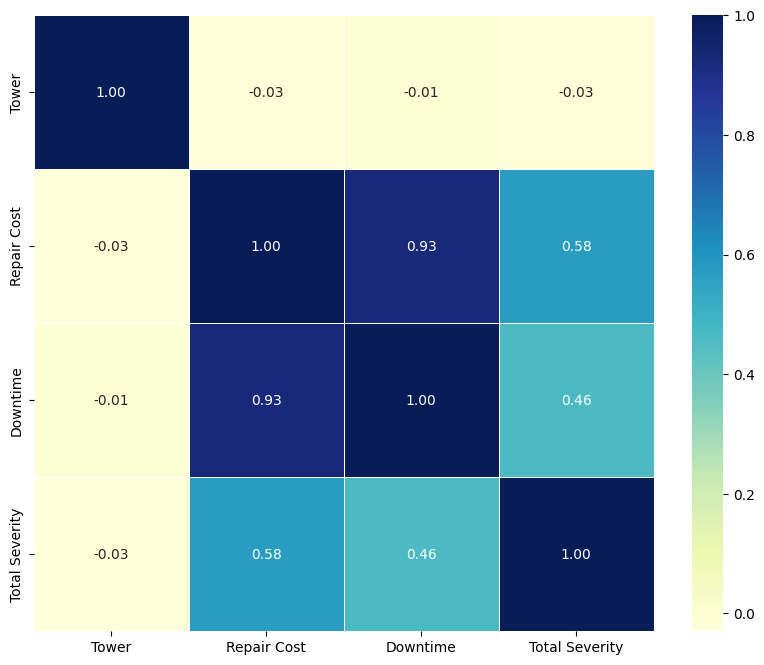

In [22]:
heatmap = merged_data_1.copy()
heatmap = heatmap.dropna(subset=['Total Severity'])
heatmap = heatmap.drop(columns=['IncidentID', 'Date', 'Description', 'Non-financial impact', 'Cause', 'Asset', 'Failure mode', 'Effect'])

cm = np.corrcoef(heatmap.values.T)
plt.figure(figsize=(10, 8))
hm = sns.heatmap(cm, annot=True, fmt=".2f", linewidths=.5, cmap="YlGnBu", xticklabels=heatmap.columns, yticklabels=heatmap.columns)

plt.show()

When looking at the heatmap it is seen that Downtime and Repair Cost have some mediate correlations with total severity. The tower however has a really low correlation, almost 0. I therefore choose to exclude Tower further in the investigation of scenerio 1. 

### *Decision tree*

A decision tree is suitable for a regression problem. Continuous y values can be predicted using input variables. A decision tree predicts values based on certain tests within the tree. In the context of these trees, the terminal nodes, or leaves, symbolize specific class labels or continuous values, while the branches signify combinations of features that lead to the assignment of those class labels/continuous values. In the context of regression, continuous values are predicted, whereas for classification class labels are predicted. 

source: https://en.wikipedia.org/wiki/Decision_tree_learning

A decision tree will be made based on the categorical and numerical columns. The missing values are filtered out, otherwise the tree won't work. The missing values are later on used for the prediction task. The categorical columns are being encoded to dummy variables, in order to make calculations possible. For the decision tree 70% training and 30% testing is choosen. The y variable is the Total Severity, since this is what I want to predict. The remaining variables are categorized as x. For this decision tree the function DecisionTreeRegressor() is used, since this is a regression problem. 

In [23]:
tree_1 = merged_data_1.dropna(subset=['Total Severity'])

In [24]:
categorical_column = ["Cause", "Asset", "Failure mode"]
numeric_column = ["Repair Cost", "Downtime"]

x_cat = tree_1[categorical_column]
x_cat = pd.get_dummies(x_cat, columns=categorical_column)

x_num = tree_1[numeric_column]

x = pd.merge(x_cat, x_num, left_index=True, right_index=True)

y = tree_1["Total Severity"]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1)

estimator = DecisionTreeRegressor()
estimator = estimator.fit(x_train, y_train)

The prediction of the decision tree based on the test data: 

In [25]:
y_pred = estimator.predict(x_test)
y_pred_train = estimator.predict(x_train)
print(y_pred)

[1. 2. 2. 2. 2. 2. 2. 1. 2. 2. 2. 1. 2. 2. 2. 2. 3. 2. 1. 3. 2. 2. 2. 2.
 1. 1. 2. 2. 2. 1. 2. 2. 1. 2. 4. 1. 2. 1. 2. 1. 1. 3. 2. 2. 1. 1. 2. 1.
 3. 1. 2. 2. 2. 2. 3. 1. 2. 2. 2. 1. 2. 1. 1. 2. 2. 2. 1. 1. 2. 2. 2. 2.
 2. 2. 1. 2. 2. 2. 2. 1. 2. 3. 1. 1. 2. 2. 2. 2. 2. 2. 2. 2. 2. 1. 2. 2.
 2. 2. 1. 1. 2. 2. 1. 2. 4. 1. 1. 1. 2. 1. 1. 2. 2. 1. 3. 2. 2. 2. 2. 1.
 1. 2. 2. 1. 2. 1. 1. 2. 1. 2. 3. 1. 2. 1. 1. 4. 2. 1. 2. 2. 1. 2. 1. 2.
 4. 1. 1. 3. 2. 1. 1. 1. 3. 1. 2. 2. 2. 2. 2. 1. 2. 4. 2. 2. 2. 1. 2. 2.
 2. 2. 1. 2. 1. 1. 1. 2. 3. 2. 2. 2. 2. 4. 2. 2. 1. 2. 3. 1. 3. 2. 2. 2.
 1. 2. 2. 2. 2. 3. 2. 1. 2. 2. 2. 2. 1. 2. 1. 2. 1. 2. 1. 1. 2. 1. 2. 2.
 3. 1. 2. 1. 2. 3. 1. 1. 1. 2. 1. 2. 2. 1. 1. 2. 1. 2. 1. 1. 1. 4. 2. 2.
 1. 2. 2. 1. 3. 2. 1. 2. 3. 4. 1. 2. 2. 1. 2. 4. 1. 2. 3. 1. 2. 2. 2. 2.
 2. 1. 2. 2. 2. 2. 2. 1. 2. 3. 1. 2. 2. 1. 2. 2. 2. 1. 1. 2. 2. 2. 2. 4.
 1. 2. 4. 3. 2. 2. 1. 3. 2. 2. 2. 2.]


Remarkable from this prediction is the fact that all values are whole numbers, and not decimal numbers. I would expect the values to be decimal numbers in a regression analysis. 

In [26]:
mae = mean_absolute_error(y_test, y_pred)
print(f'MAE test: {mae:.2f}')
mae_train = mean_absolute_error(y_train, y_pred_train)
print(f'MAE train: {mae_train:.2f}')

MAE test: 0.00
MAE train: 0.00


The lower the MAE, the smalller the difference between y_test and y_pred and y_train and y_pred_train. Since the MAE is 0, the fit of the model is good for both the testing and training data. 

In [27]:
r2 =r2_score(y_test, y_pred)
print(f'R^2 test: {r2:.2f}')
r2_train = r2_score(y_train, y_pred_train)
print(f'R^2 train: {r2_train:.2f}')

R^2 test: 1.00
R^2 train: 1.00


The R^2 is 1, which means that all the variance of y_pred and y_pred_train is explained by the model. This means that the fit of the model is good.

In [28]:
pickle.dump(estimator, open("dt_autopilot.pkl_3", 'wb'))

The decision tree will not be restricted on its depth.

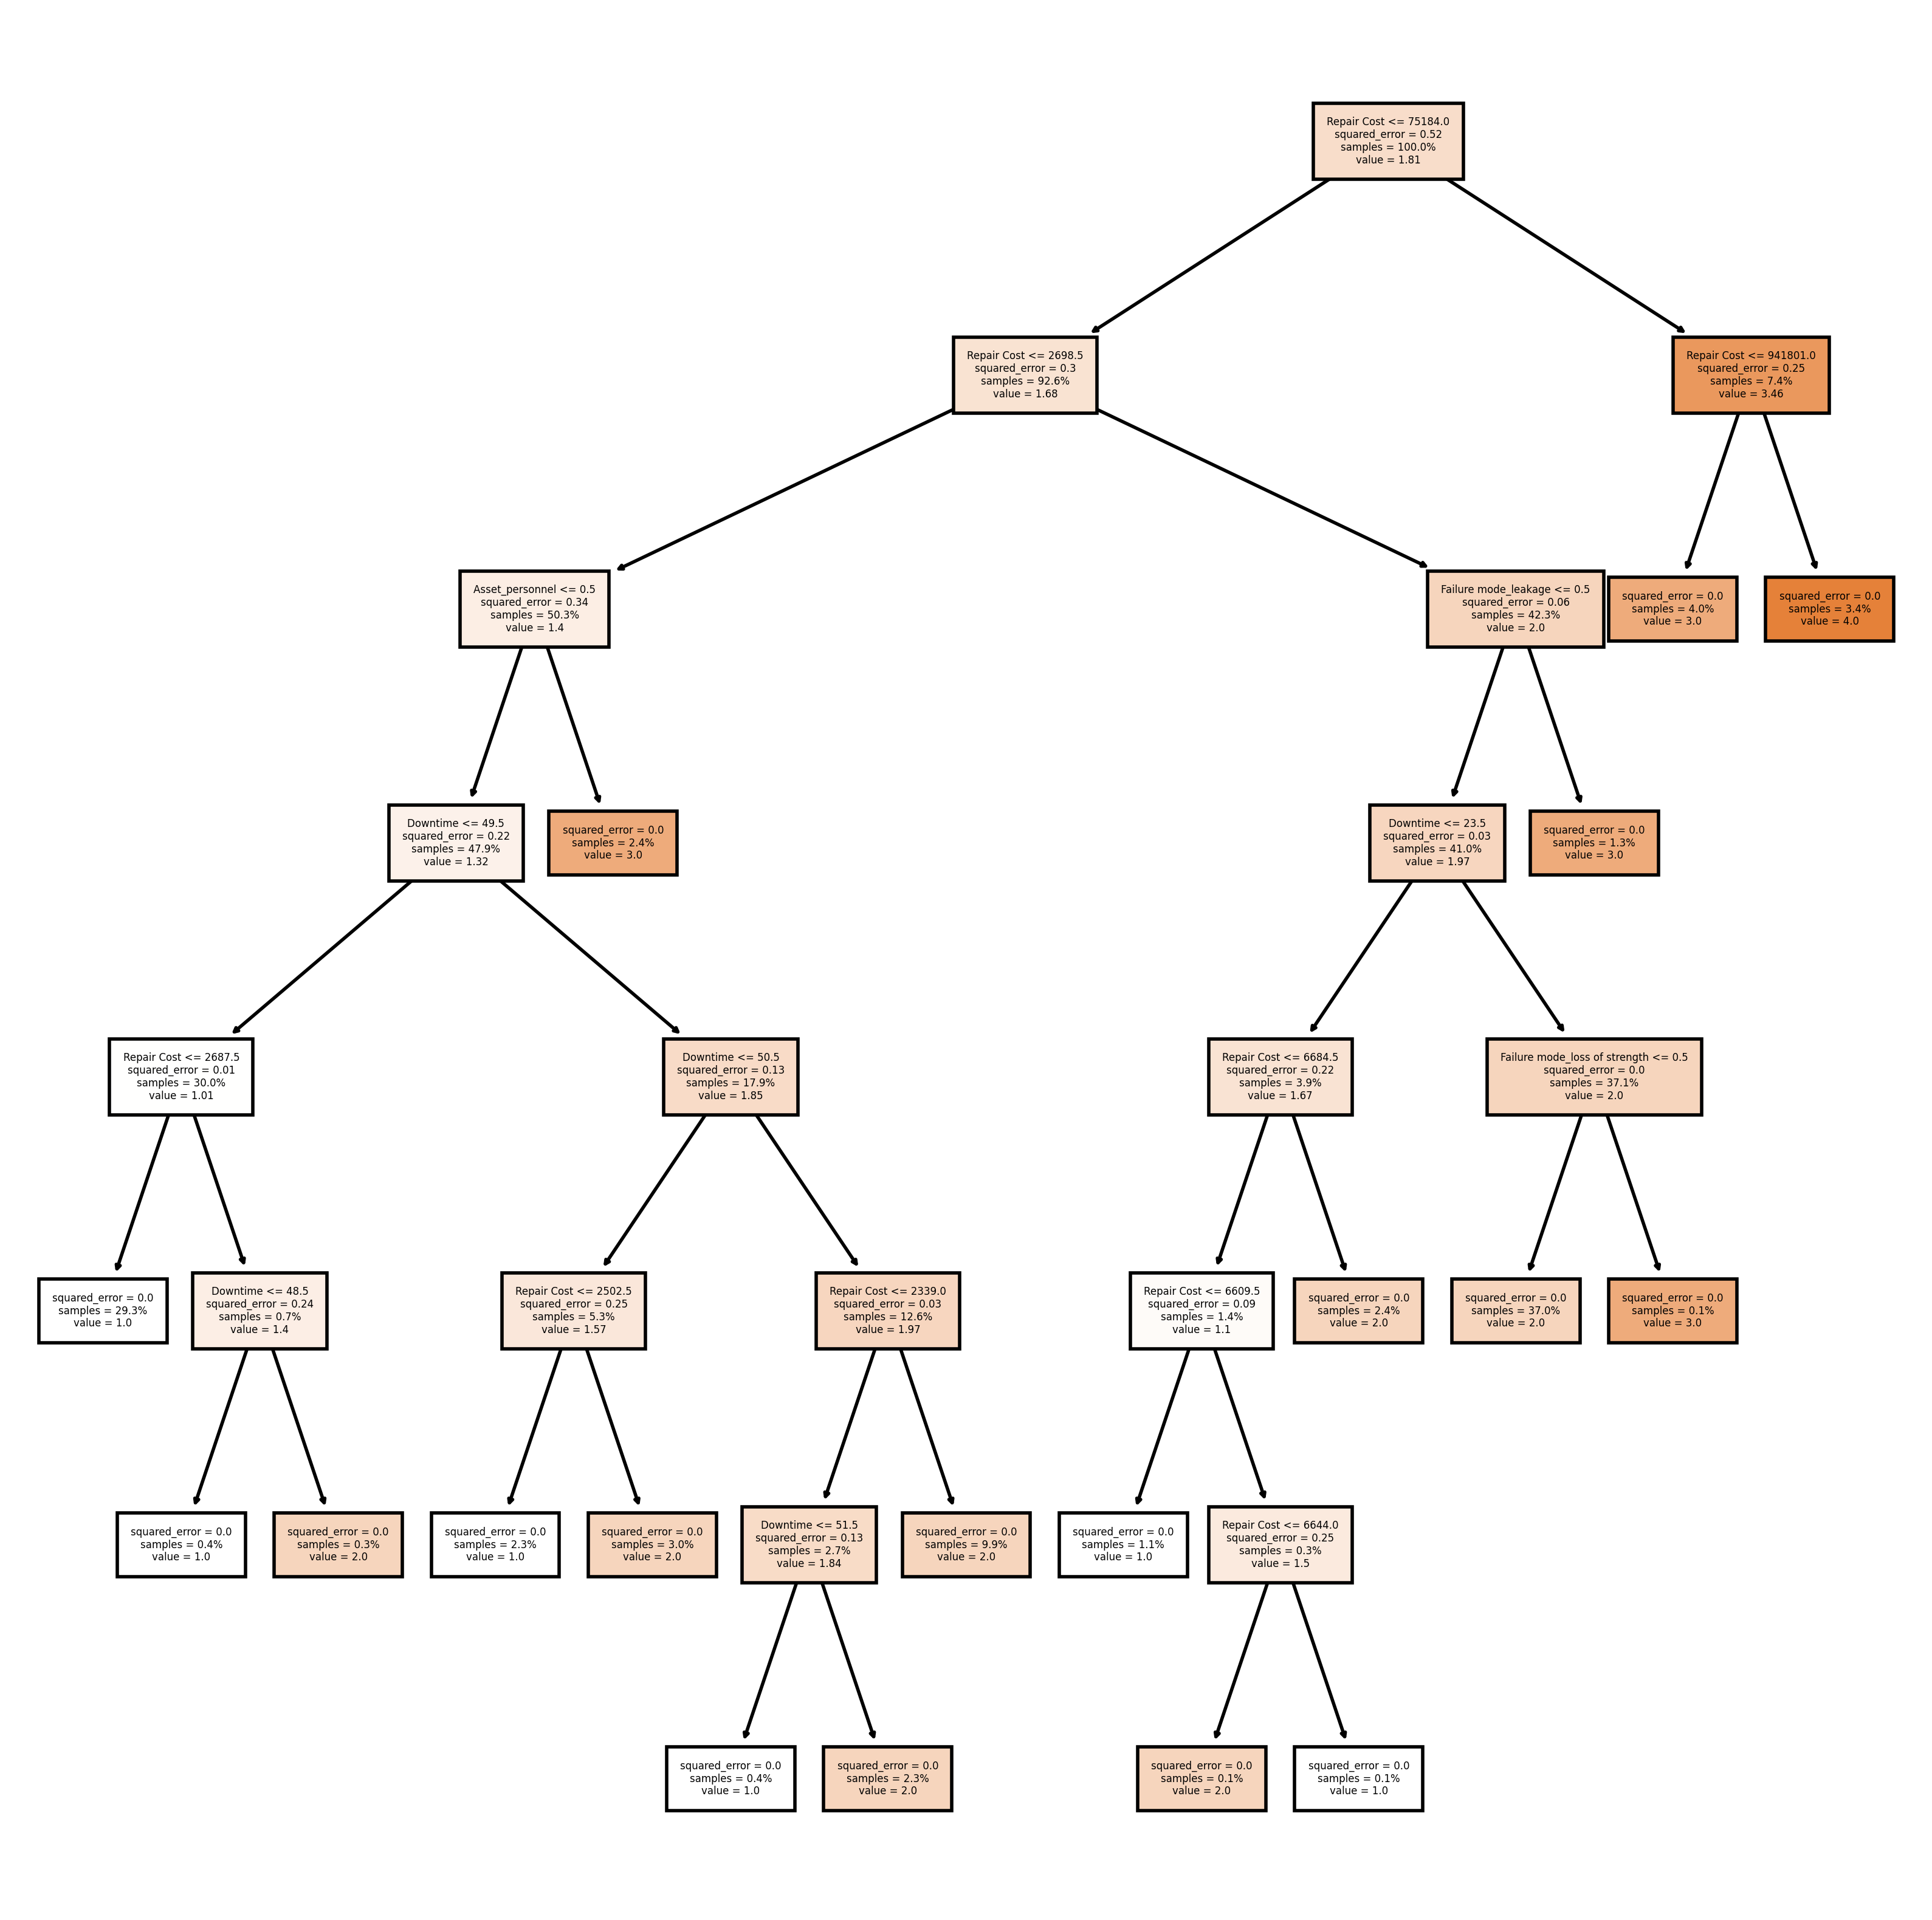

In [29]:
plt.figure(dpi=400,edgecolor="r",figsize=(10,10))
f = x.columns
plot_tree(estimator, filled=True,feature_names=f,rounded=False,precision=2,fontsize=3,proportion=True,max_depth=None)
plt.savefig('dt.png')
plt.show()

This is the decision tree printed out. The decision has no specified classes, since the classes are continuous. The decision tree has multiple colours, indicating lower and higher levels of total severity. The first decision of the decision tree depends on the repair cost. Repair cost and downtime are the most important decisions of the tree, since they occur most often. There are also some categories from the categorical variables seen in the decision tree, for example: Asset_personnel. 

#### Predicting total severity using the decision tree

In the merged data set, there are a lot of missing values in the end of the file for Total Severity. These values are filtered out into a new dataset, in order to predict these values using the previous decision tree. 

In [30]:
missing_data_tree = merged_data_1[merged_data_1["Total Severity"].isnull()]

In [31]:
categorical_column = ["Cause", "Asset", "Failure mode"]
numeric_column = ["Repair Cost", "Downtime"]

X_missing_cat = missing_data_tree[categorical_column]
X_missing_cat = pd.get_dummies(X_missing_cat, columns= categorical_column)

X_missing_num = missing_data_tree[numeric_column]

X_missing = pd.merge(X_missing_cat, X_missing_num, left_index=True, right_index=True)

In [32]:
print("Number of columns in training dataset:", x_train.shape[1])
print("Number of columns in predicting dataset:", X_missing.shape[1])

Number of columns in training dataset: 47
Number of columns in predicting dataset: 38


The number of columns in the training and predicting data set are not the same. This is due to the tranformation to dummy variables. The prediction won't work if the number of columns differ. Therefore I choose to fill in the missing columns in the prediction data, with the mean value of the training data. This way I hope to minimize the influence of this column on the prediction task. Note that this approach will still influence the prediction by setting values that are originally not present in the selected data. 

In [33]:
missing_columns = []
for column in x_train.columns:
    if column not in X_missing.columns:
        missing_columns.append(column)
        mean_value = x_train[column].mean()
        X_missing[column] = mean_value

X_missing = X_missing[x_train.columns] # the columns should also be in the same order as the training data in order to make predictions 
        
print("Missing columns:", len(missing_columns))

Missing columns: 9


With the added columns, and the columns being placed in the right order, the prediction task can be performed on X_missing. 

In [34]:
predicted_values = estimator.predict(X_missing)
print(predicted_values)

[2. 1. 1. 2. 2. 1. 3. 2. 2. 2. 1. 1. 4. 2. 2. 2. 1. 2. 2. 2. 2. 2. 1. 1.
 2. 1. 2. 2. 1. 4. 1. 1. 1. 2. 2. 2. 2. 1. 3. 2. 2. 3. 1. 2. 3. 3. 1. 1.
 1. 2. 2. 2. 1. 1. 4. 1. 2. 2. 2. 2. 2. 2. 2. 1. 2. 1. 1. 1. 1. 2. 4. 1.
 1. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 1. 2. 3. 1. 1. 1. 2. 3. 2. 1.
 1. 2. 1. 2.]


These are the predicted values of Total Severity for the missing values in the dataset. 

### *Random Forest Regression*

I have chosen for the Random Forest Regression as the second regression approach. This method is suitable for regression, and can later on also be used for classification. The random forest regression is a method which uses mutiple decision trees, returning the mean of all the trees for the prediction task. Multiple variables can be used for the Random Forest Regression. I will be using both numerical and categorical values in one model. 

source: https://en.wikipedia.org/wiki/Random_forest

In [35]:
forest_1 = merged_data_1.dropna(subset=['Total Severity'])

In [36]:
categorical_column = ["Cause", "Asset", "Failure mode"]
numeric_column = ["Repair Cost", "Downtime", "Total Severity"]

x_cat = forest_1[categorical_column]
x_cat = pd.get_dummies(x_cat, columns=categorical_column)

x_num = forest_1[numeric_column]

forest_1 = pd.merge(x_cat, x_num, left_index=True, right_index=True)

The target is Total Severity, corresponding to y, and the features are the remaining columns corresponding to x. For this method 30% testing is used. The RandomForestRegressor function will be used, where a number of 1000 trees will be used for the prediction task. This means that the mean value of 1000 trees is returned for the prediction. The criterion choosen for the random forest regression in squared error, measuring the squared error between predicted and trained/tested values. This is a good approach for regression. A prediction will be made for both the training and the testing data. 

In [37]:
target = 'Total Severity'
features = forest_1.columns[forest_1.columns != target]
X = forest_1[features].values
y = forest_1[target].values
X_train, X_test, y_train, y_test = train_test_split(
X, y, test_size=0.3, random_state=123)

forest = RandomForestRegressor(
n_estimators=1000, 
criterion='squared_error', 
random_state=1, 
n_jobs=-1)

forest.fit(X_train, y_train)
y_train_pred = forest.predict(X_train)
y_test_pred = forest.predict(X_test)

In [38]:
mae_train = mean_absolute_error(y_train, y_train_pred)
mae_test = mean_absolute_error(y_test, y_test_pred)
print(f'MAE train: {mae_train:.2f}')
print(f'MAE test: {mae_test:.2f}')

MAE train: 0.01
MAE test: 0.02


The lower the MAE, the more suitable the model is for predicting. This model is good at predicting both training and testing data. 

In [39]:
r2_train = r2_score(y_train, y_train_pred)
r2_test =r2_score(y_test, y_test_pred)
print(f'R^2 train: {r2_train:.2f}')
print(f'R^2 test: {r2_test:.2f}')

R^2 train: 1.00
R^2 test: 0.97


A R^2 close to 1.0 indicates a good fitting model, where the variance of y is explained by the model. Both training and testing have a good fit. 

The random forest regression will be visualized using two plots for the training and testing data to visualize the residuals. 

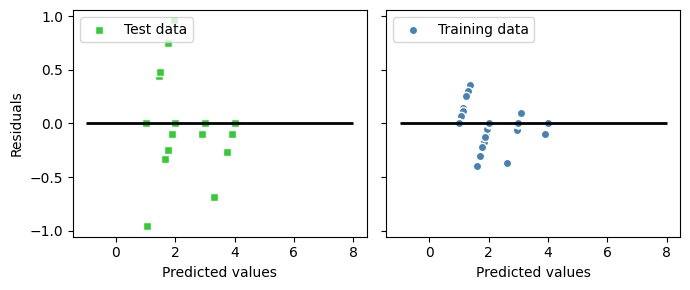

In [40]:
x_max = np.max([np.max(y_train_pred), np.max(y_test_pred)])
x_min = np.min([np.min(y_train_pred), np.min(y_test_pred)])
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(7, 3), sharey=True)
ax1.scatter(y_test_pred, y_test_pred - y_test,
                 c='limegreen', marker='s', edgecolor='white',
                 label='Test data')
ax2.scatter(y_train_pred, y_train_pred - y_train,
                 c='steelblue', marker='o', edgecolor='white',
                 label='Training data')
ax1.set_ylabel('Residuals')
for ax in (ax1, ax2):
         ax.set_xlabel('Predicted values')
         ax.legend(loc='upper left')
         ax.hlines(y=0, xmin=x_min-2, xmax=x_max+4,
                   color='black', lw=2)
plt.tight_layout()
plt.show()

When looking at the two plots some predicting errors are seen, where the points deviate much from the horizontal axis. There are more outliers at testing. There are also some values on the line, or close to the line, indicating a good fit of the model. 

#### Predicting total severity using Random Forest Regression

To predict the missing values of total severity, the random forest model will be used. The same approach as for the decision tree will be used, only a different model will be used. 

In [41]:
missing_data_forest = merged_data_1[merged_data_1["Total Severity"].isnull()]

In [42]:
categorical_column = ["Cause", "Asset", "Failure mode"]
numeric_column = ["Repair Cost", "Downtime"]

x_missing_cat = missing_data_forest[categorical_column]
x_missing_cat = pd.get_dummies(x_missing_cat, columns= categorical_column)

x_missing_num = missing_data_forest[numeric_column]

x_missing = pd.merge(x_missing_cat, x_missing_num, left_index=True, right_index=True)

The prediction is not working beceause there is a mismatch in columns between X and x_missing:

In [43]:
print("Number of columns in training dataset:", X_train.shape[1])
print("Number of columns in predicting dataset:", x_missing.shape[1])

Number of columns in training dataset: 47
Number of columns in predicting dataset: 38


In [44]:
missing_columns = []
for column in forest_1.columns[forest_1.columns != target]: #cannot use x_train since it is an NumPy array 
    if column not in x_missing.columns:
        missing_columns.append(column)
        mean_value = forest_1[column].mean()
        x_missing[column] = mean_value

x_missing = x_missing[forest_1.columns[forest_1.columns != target]] #the columns in the same order as the training data
        
print("Missing columns:", len(missing_columns))

Missing columns: 9


In [45]:
y_pred_missing = forest.predict(x_missing)
print(y_pred_missing)

C:\Users\vande\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:458: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(


[2.001 1.001 1.    2.    2.    1.    3.    2.    2.    2.    1.    1.005
 4.    2.    2.    2.    1.    2.    2.    2.    2.    2.    1.    1.
 1.981 1.    2.    2.    1.    4.    1.    1.    1.    2.    2.    2.
 2.    1.    3.    2.    2.    3.    1.    1.996 3.    3.    1.    1.
 1.    2.    1.842 1.999 1.    1.    3.996 1.    2.    2.    2.    2.
 2.    2.    2.    1.005 2.    1.    1.    1.035 1.015 2.    4.    1.
 1.    2.    2.    2.    1.998 2.    2.    2.    1.996 2.    2.002 2.
 2.    2.    1.    2.    3.    1.    1.005 1.    2.    3.    2.    1.
 1.254 2.    1.    2.   ]


Some values have decimals, since regression can also predict continuous outcomes. This differs from the decision tree, where only whole numbers were predicted. 

### *Conclusion scenerio 1*

When looking at the MAE and R^2 of the test data and training data, it is seen that the decision tree is performing slightly better than the random forest regressor. This means that the decision tree has a better fit with the data, which means more accurate prediction can be made. The difference however between the methods is really small, and both methods perform really well. Therefore both methods are good for the prediction task. 

### Question 3.1.2

*Scenario 2*

Scenerio 2 consists of the same steps as scenario 1, only a different dataset is used. 

In [46]:
incident_2.head()

,IncidentID,Date,Tower,Description,Repair Cost,Downtime,Non-financial impact,Total Severity
0,1,05/01/2011,26,Construction error of the gearbox resulted in ...,7449,24,Slippery floor,2.0
1,2,09/01/2011,7,Incorrect input for the pitch system resulted ...,2443,48,NaN,1.0
2,3,15/01/2011,22,Construction error of the gearbox resulted in ...,6504,23,Slippery floor,1.0
3,4,20/01/2011,18,Contamination (salt build up) on the transform...,5569,45,NaN,2.0
4,5,27/01/2011,6,Construction error of the gearbox resulted in ...,7219,26,Slippery floor,2.0


In [47]:
Incident_coding.head()

,IncidentID,Date,Tower,Repair Cost,Downtime,Cause,Asset,Failure mode,Effect
0,1,05/01/2011,26,7449,24,Construction error,gearbox,oil lekage,"Cost, downtime and Slippery floor"
1,2,09/01/2011,7,2443,48,Incorrect input,pitch system,trip (forced shutdown),"Cost, downtime"
2,3,15/01/2011,22,6504,23,Construction error,gearbox,oil lekage,"Cost, downtime and Slippery floor"
3,4,20/01/2011,18,5569,45,Contamination (salt build up),transformer,trip (forced shutdown),"Cost, downtime"
4,5,27/01/2011,6,7219,26,Construction error,gearbox,oil lekage,"Cost, downtime and Slippery floor"


Merging the datasets based on corresponding columns 

In [48]:
merged_data_2 = pd.merge(incident_2, Incident_coding, on = ["IncidentID", "Date", "Tower", "Repair Cost", "Downtime"], how = "outer")

Non financial impact and Effect will not be used for the same reason as scenario 1. 

### *Heatmap*

A heatmap will be used to look at the correlations of the numerical columns 

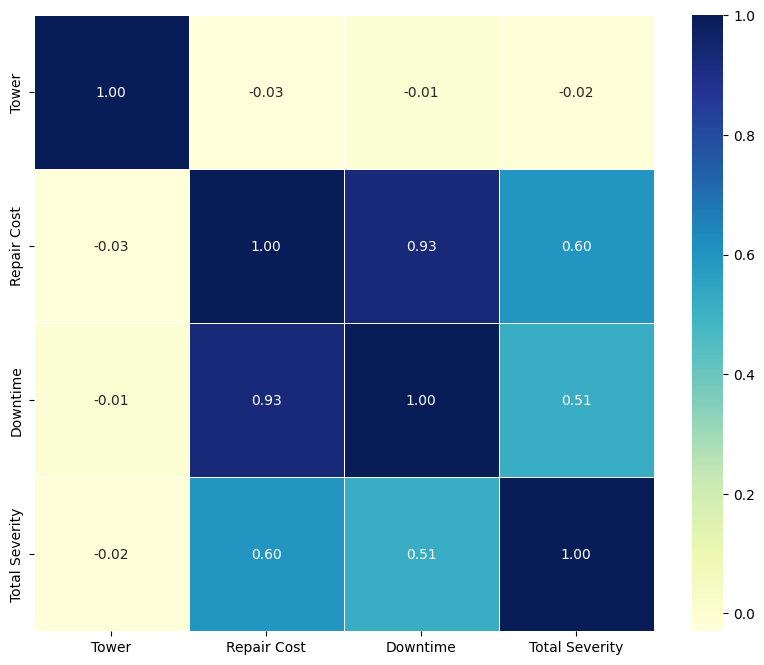

In [49]:
heatmap = merged_data_2.copy()
heatmap = heatmap.dropna(subset=['Total Severity'])
heatmap = heatmap.drop(columns=['IncidentID', 'Date', 'Description', 'Non-financial impact', 'Cause', 'Asset', 'Failure mode', 'Effect'])

cm = np.corrcoef(heatmap.values.T)
plt.figure(figsize=(10, 8))
hm = sns.heatmap(cm, annot=True, fmt=".2f", linewidths=.5, cmap="YlGnBu", xticklabels=heatmap.columns, yticklabels=heatmap.columns)

plt.show()

The same conclusion as scenario 1 occurs: the column Tower will be excluded. 

### *Decision tree*

A decision tree will be made based on the categorical and numerical columns. Therefore the categorical columns are being encoded to dummy variables. 

In [50]:
tree_2 = merged_data_2.dropna(subset=['Total Severity'])

In [51]:
categorical_column = ["Cause", "Asset", "Failure mode"]
numeric_column = ["Repair Cost", "Downtime"]

x_cat = tree_2[categorical_column]
x_cat = pd.get_dummies(x_cat, columns=categorical_column)

x_num = tree_2[numeric_column]

x = pd.merge(x_cat, x_num, left_index=True, right_index=True)

y = tree_2["Total Severity"]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1)

estimator = DecisionTreeRegressor()
estimator = estimator.fit(x_train, y_train)

In [52]:
y_pred = estimator.predict(x_test)
y_pred_train = estimator.predict(x_train)
print(y_pred)

[1. 2. 2. 2. 2. 2. 2. 1. 2. 2. 2. 1. 2. 2. 2. 2. 4. 2. 1. 3. 2. 2. 2. 2.
 1. 1. 2. 2. 2. 1. 2. 2. 1. 2. 5. 1. 2. 1. 2. 1. 1. 3. 2. 2. 1. 1. 2. 1.
 4. 1. 2. 2. 2. 2. 3. 1. 2. 2. 2. 1. 2. 1. 1. 2. 2. 2. 1. 1. 2. 2. 2. 2.
 2. 2. 1. 2. 2. 2. 2. 1. 2. 4. 1. 1. 2. 2. 2. 2. 2. 2. 2. 2. 2. 1. 2. 2.
 2. 2. 1. 1. 2. 2. 1. 2. 4. 1. 1. 1. 2. 1. 1. 2. 2. 1. 4. 2. 2. 2. 2. 1.
 1. 2. 2. 1. 2. 1. 1. 2. 1. 2. 4. 1. 2. 1. 1. 4. 2. 1. 2. 2. 1. 2. 1. 2.
 5. 1. 1. 4. 2. 1. 1. 1. 4. 1. 2. 2. 2. 2. 2. 1. 2. 4. 2. 2. 2. 1. 2. 2.
 2. 2. 1. 2. 1. 1. 1. 2. 3. 2. 2. 2. 2. 4. 2. 2. 1. 2. 3. 1. 4. 2. 2. 2.
 1. 2. 2. 2. 2. 4. 2. 1. 2. 2. 2. 2. 1. 2. 1. 2. 1. 2. 1. 1. 2. 1. 2. 2.
 4. 1. 2. 1. 2. 4. 1. 1. 1. 2. 1. 2. 2. 1. 1. 2. 1. 2. 1. 1. 1. 4. 2. 2.
 1. 2. 2. 1. 3. 2. 1. 2. 4. 4. 1. 2. 2. 1. 2. 5. 1. 2. 3. 1. 2. 2. 2. 2.
 2. 1. 2. 2. 2. 2. 2. 1. 2. 3. 1. 2. 2. 1. 2. 2. 2. 1. 1. 2. 2. 2. 2. 5.
 1. 2. 4. 4. 2. 2. 1. 4. 2. 2. 2. 2.]


In [53]:
mae = mean_absolute_error(y_test, y_pred)
print(f'MAE test: {mae:.2f}')
mae_train = mean_absolute_error(y_train, y_pred_train)
print(f'MAE train: {mae_train:.2f}')

MAE test: 0.00
MAE train: 0.00


Good fit of the model for both training and testing 

In [54]:
r2 =r2_score(y_test, y_pred)
print(f'R^2 test: {r2:.2f}')
r2_train = r2_score(y_train, y_pred_train)
print(f'R^2 train: {r2_train:.2f}')

R^2 test: 1.00
R^2 train: 1.00


Good fit of the model for both testing and training data

In [55]:
pickle.dump(estimator, open("dt_autopilot.pkl_3", 'wb'))

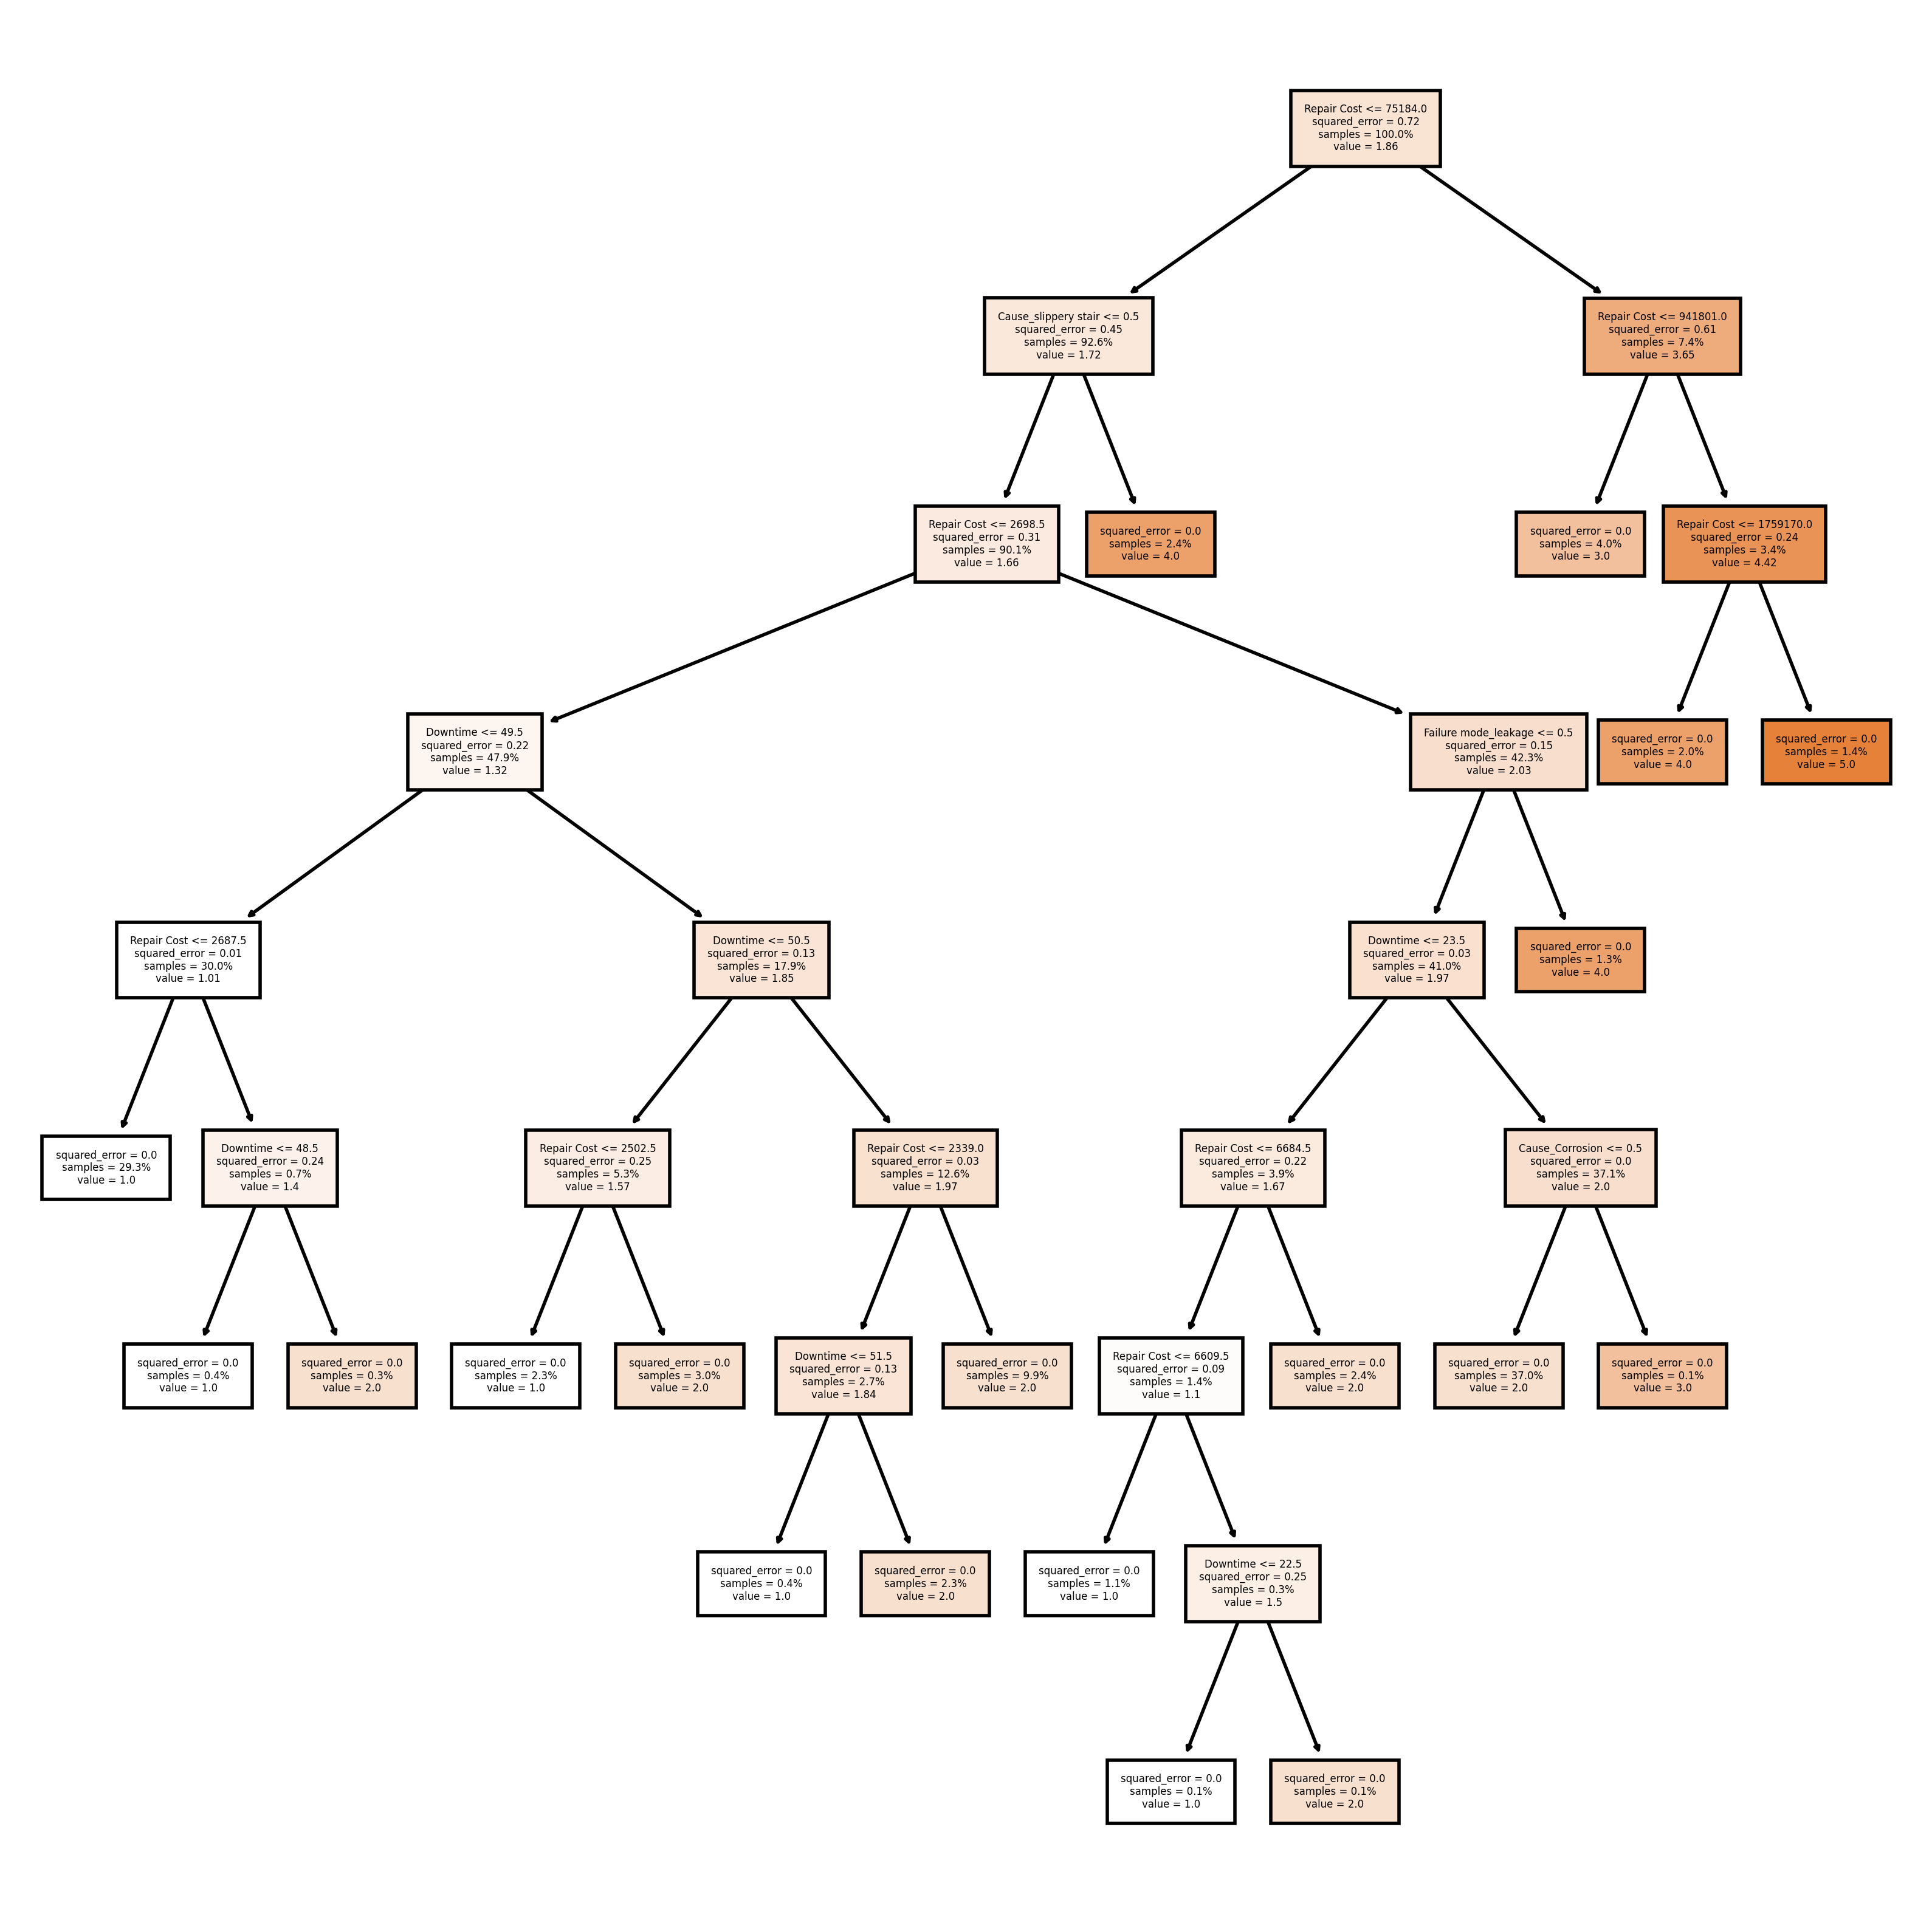

In [56]:
plt.figure(dpi=400,edgecolor="r",figsize=(10,10))
f = x.columns
plot_tree(estimator, filled=True,feature_names=f,rounded=False,precision=2,fontsize=3,proportion=True,max_depth=None)
plt.savefig('dt.png')
plt.show()

Downtime and Repair Cost are the most frequent decisions in the tree. This tree is larger than the tree in scenario 1, this tree has 9 layers, where the tree in scenario 1 has 8 layers. This difference can be explained by the fact that there is one extra risk level in scenario 2. This tree also has a cleares distinction between the colours; where the darker colours are on the right corner, and the remaining colours are light, indicating lower levels. 

#### Prediction using the decision tree

In [57]:
missing_data_tree_2 = merged_data_2[merged_data_2["Total Severity"].isnull()]

In [58]:
categorical_column = ["Cause", "Asset", "Failure mode"]
numeric_column = ["Repair Cost", "Downtime"]

X_missing_cat = missing_data_tree_2[categorical_column]
X_missing_cat = pd.get_dummies(X_missing_cat, columns= categorical_column)

X_missing_num = missing_data_tree_2[numeric_column]

X_missing = pd.merge(X_missing_cat, X_missing_num, left_index=True, right_index=True)

In [59]:
print("Number of columns in training dataset:", x_train.shape[1])
print("Number of columns in predicting dataset:", X_missing.shape[1])

Number of columns in training dataset: 47
Number of columns in predicting dataset: 38


In [60]:
missing_columns = []
for column in x_train.columns:
    if column not in X_missing.columns:
        missing_columns.append(column)
        mean_value = x_train[column].mean()
        X_missing[column] = mean_value

X_missing = X_missing[x_train.columns] # the columns should also be in the same order as the training data in order to make predictions 
        
print("Missing columns:", len(missing_columns))

Missing columns: 9


In [61]:
predicted_values = estimator.predict(X_missing)
print(predicted_values)

[2. 1. 1. 2. 2. 1. 4. 2. 2. 2. 1. 1. 5. 2. 2. 2. 1. 2. 2. 2. 2. 2. 1. 1.
 2. 1. 2. 2. 1. 4. 1. 1. 1. 2. 2. 2. 2. 1. 3. 2. 2. 4. 1. 2. 4. 4. 1. 1.
 1. 2. 2. 2. 1. 1. 4. 1. 2. 2. 2. 2. 2. 2. 2. 1. 2. 1. 1. 1. 1. 2. 4. 1.
 1. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 1. 2. 3. 1. 1. 1. 2. 4. 2. 1.
 2. 2. 1. 2.]


One extra level is predicted: 5.0

### *Random Forest Regression*

The same settings as scenario 1

In [62]:
forest_2 = merged_data_2.dropna(subset=['Total Severity'])

In [63]:
categorical_column = ["Cause", "Asset", "Failure mode"]
numeric_column = ["Repair Cost", "Downtime", "Total Severity"]

x_cat = forest_2[categorical_column]
x_cat = pd.get_dummies(x_cat, columns=categorical_column)

x_num = forest_2[numeric_column]

forest_2 = pd.merge(x_cat, x_num, left_index=True, right_index=True)

In [64]:
target = 'Total Severity'
features = forest_2.columns[forest_2.columns != target]
X = forest_2[features].values
y = forest_2[target].values
X_train, X_test, y_train, y_test = train_test_split(
X, y, test_size=0.3, random_state=123)

forest = RandomForestRegressor(
n_estimators=1000, 
criterion='squared_error', 
random_state=1, 
n_jobs=-1)

forest.fit(X_train, y_train)
y_train_pred = forest.predict(X_train)
y_test_pred = forest.predict(X_test)

In [65]:
mae_train = mean_absolute_error(y_train, y_train_pred)
mae_test = mean_absolute_error(y_test, y_test_pred)
print(f'MAE train: {mae_train:.2f}')
print(f'MAE test: {mae_test:.2f}')

MAE train: 0.01
MAE test: 0.02


Good fit of the model. The training data prediction is slightly better than testing. 

In [66]:
r2_train = r2_score(y_train, y_train_pred)
r2_test =r2_score(y_test, y_test_pred)
print(f'R^2 train: {r2_train:.2f}')
print(f'R^2 test: {r2_test:.2f}')

R^2 train: 1.00
R^2 test: 0.98


Good fit of the model. The training data prediction is slightly better than testing. 

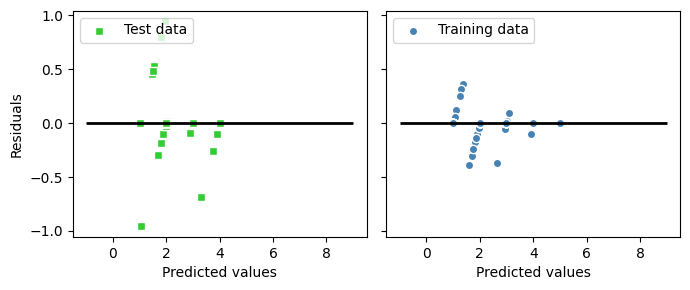

In [67]:
x_max = np.max([np.max(y_train_pred), np.max(y_test_pred)])
x_min = np.min([np.min(y_train_pred), np.min(y_test_pred)])
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(7, 3), sharey=True)
ax1.scatter(y_test_pred, y_test_pred - y_test,
                 c='limegreen', marker='s', edgecolor='white',
                 label='Test data')
ax2.scatter(y_train_pred, y_train_pred - y_train,
                 c='steelblue', marker='o', edgecolor='white',
                 label='Training data')
ax1.set_ylabel('Residuals')
for ax in (ax1, ax2):
         ax.set_xlabel('Predicted values')
         ax.legend(loc='upper left')
         ax.hlines(y=0, xmin=x_min-2, xmax=x_max+4,
                   color='black', lw=2)
plt.tight_layout()
plt.show()

Testing has more outliers than training, but overall the points are clustered around the line. 

#### Prediction using Random Forest Regression

In [68]:
missing_data_forest_2 = merged_data_2[merged_data_2["Total Severity"].isnull()]

In [69]:
categorical_column = ["Cause", "Asset", "Failure mode"]
numeric_column = ["Repair Cost", "Downtime"]

x_missing_cat = missing_data_forest_2[categorical_column]
x_missing_cat = pd.get_dummies(x_missing_cat, columns= categorical_column)

x_missing_num = missing_data_forest_2[numeric_column]

x_missing = pd.merge(x_missing_cat, x_missing_num, left_index=True, right_index=True)

In [70]:
print("Number of columns in training dataset:", X_train.shape[1])
print("Number of columns in predicting dataset:", x_missing.shape[1])

Number of columns in training dataset: 47
Number of columns in predicting dataset: 38


In [71]:
missing_columns = []
for column in forest_2.columns[forest_2.columns != target]: #cannot use x_train since it is an NumPy array 
    if column not in x_missing.columns:
        missing_columns.append(column)
        mean_value = forest_2[column].mean()
        x_missing[column] = mean_value

x_missing = x_missing[forest_2.columns[forest_2.columns != target]] #the columns in the same order as the training data
        
print("Missing columns:", len(missing_columns))

Missing columns: 9


In [72]:
y_pred_missing = forest.predict(x_missing)
print(y_pred_missing)

C:\Users\vande\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:458: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(


[2.001 1.    1.    2.    2.    1.    4.    2.    2.    2.    1.    1.
 5.    2.    2.    2.    1.    2.    2.    2.    2.    2.    1.    1.
 1.982 1.    2.    2.    1.    4.002 1.    1.    1.    2.    2.    2.
 2.    1.    3.    2.    2.    4.    1.    1.996 4.    4.    1.    1.
 1.    2.    1.91  1.999 1.    1.    3.998 1.    2.    2.    1.998 2.
 2.    2.    2.    1.    2.    1.    1.    1.036 1.001 2.    4.002 1.
 1.    2.    2.    2.    2.    2.    2.    2.    1.999 2.    2.    2.
 2.    2.    1.    2.    3.    1.001 1.003 1.    2.    4.    2.    1.
 1.255 2.    1.    2.   ]


Some continuous values in the prediction outcomes. 

### *Conclusion for scenerio 2*

The results of scenerio 2 are exactly the same as for scenerio 1; the decision tree is performing slightly better than the random forest regressor. 

## Question 3.2

In [73]:
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

For this part the prediction task will be assigned as a classification problem. Therefore the values of Total Severity will be adjusted to 0 and 1. There are two cases, where the binary values of Total Severity are set differently. The two scenerios will be investigated among the two cases using the same two methods as the regression problem, only some adjustments are made to quallify for a classifiction approach. 

### Question 3.2.1.1

*Case 1, Scenario 1*

Changing the values of Total Severity to binary values: Adjusting the severity level to 0 for level 1 and to 1 for the other levels. 

In [74]:
data_new_risk = merged_data_1.copy()
for index, row in data_new_risk.iterrows():
    if row["Total Severity"] <= 1:
        data_new_risk.at[index, "Total Severity"] = 0
    elif row["Total Severity"] >= 2:
        data_new_risk.at[index, "Total Severity"] = 1

data_new_risk.head()

,IncidentID,Date,Tower,Description,Repair Cost,Downtime,Non-financial impact,Total Severity,Cause,Asset,Failure mode,Effect
0,1,05/01/2011,26,Construction error of the gearbox resulted in ...,7449,24,Slippery floor,1.0,Construction error,gearbox,oil lekage,"Cost, downtime and Slippery floor"
1,2,09/01/2011,7,Incorrect input for the pitch system resulted ...,2443,48,NaN,0.0,Incorrect input,pitch system,trip (forced shutdown),"Cost, downtime"
2,3,15/01/2011,22,Construction error of the gearbox resulted in ...,6504,23,Slippery floor,0.0,Construction error,gearbox,oil lekage,"Cost, downtime and Slippery floor"
3,4,20/01/2011,18,Contamination (salt build up) on the transform...,5569,45,NaN,1.0,Contamination (salt build up),transformer,trip (forced shutdown),"Cost, downtime"
4,5,27/01/2011,6,Construction error of the gearbox resulted in ...,7219,26,Slippery floor,1.0,Construction error,gearbox,oil lekage,"Cost, downtime and Slippery floor"


### *Decision tree*

For the decision tree, the same approach will be used as for the regression problem, the only difference is that the decision tree is adjusted to a classification tree using DecisionTreeClassifier(). This means that no longer continuous values are predicted, but classes of values are predicted. To asses the performance of the model, the accuracy score will be used instead of the MAE and R^2. 

In [75]:
tree_data_new_risk = data_new_risk.dropna(subset=['Total Severity'])

The same columns will be used for the classification. 

In [76]:
categorical_column = ["Cause", "Asset", "Failure mode"]
numeric_column = ["Repair Cost", "Downtime"]

x_cat = tree_data_new_risk[categorical_column]
x_cat = pd.get_dummies(x_cat, columns=categorical_column)

x_num = tree_data_new_risk[numeric_column]

x = pd.merge(x_cat, x_num, left_index=True, right_index=True)

y = tree_data_new_risk["Total Severity"]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1)

estimator = DecisionTreeClassifier()
estimator = estimator.fit(x_train, y_train)

y_pred = estimator.predict(x_test)
y_pred_train = estimator.predict(x_train)
print(y_pred)

[0. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1.
 0. 0. 1. 1. 1. 0. 1. 1. 0. 1. 1. 0. 1. 0. 1. 0. 0. 1. 1. 1. 0. 0. 1. 0.
 1. 0. 1. 1. 1. 1. 1. 0. 1. 1. 1. 0. 1. 0. 0. 1. 1. 1. 0. 0. 1. 1. 1. 1.
 1. 1. 0. 1. 1. 1. 1. 0. 1. 1. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1.
 1. 1. 0. 0. 1. 1. 0. 1. 1. 0. 0. 0. 1. 0. 0. 1. 1. 0. 1. 1. 1. 1. 1. 0.
 0. 1. 1. 0. 1. 0. 0. 1. 0. 1. 1. 0. 1. 0. 0. 1. 1. 0. 1. 1. 0. 1. 0. 1.
 1. 0. 0. 1. 1. 0. 0. 0. 1. 0. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 0. 1. 1.
 1. 1. 0. 1. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 0. 1. 1. 1. 1.
 0. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 0. 1. 0. 1. 0. 1. 0. 0. 1. 0. 1. 1.
 1. 0. 1. 0. 1. 1. 0. 0. 0. 1. 0. 1. 1. 0. 0. 1. 0. 1. 0. 0. 0. 1. 1. 1.
 0. 1. 1. 0. 1. 1. 0. 1. 1. 1. 0. 1. 1. 0. 1. 1. 0. 1. 1. 0. 1. 1. 1. 1.
 1. 0. 1. 1. 1. 1. 1. 0. 1. 1. 0. 1. 1. 0. 1. 1. 1. 0. 0. 1. 1. 1. 1. 1.
 0. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1.]


In [77]:
print("Accuracy test:",metrics.accuracy_score(y_test, y_pred))

Accuracy test: 1.0


In [78]:
print("Accuracy train:",metrics.accuracy_score(y_train, y_pred_train))

Accuracy train: 1.0


A accuracy score of 1 means that all values of y_pred and y_pred_train are correctly predicted. 

For the decision tree classes must be specified, which are the risk levels being 0 and 1. 

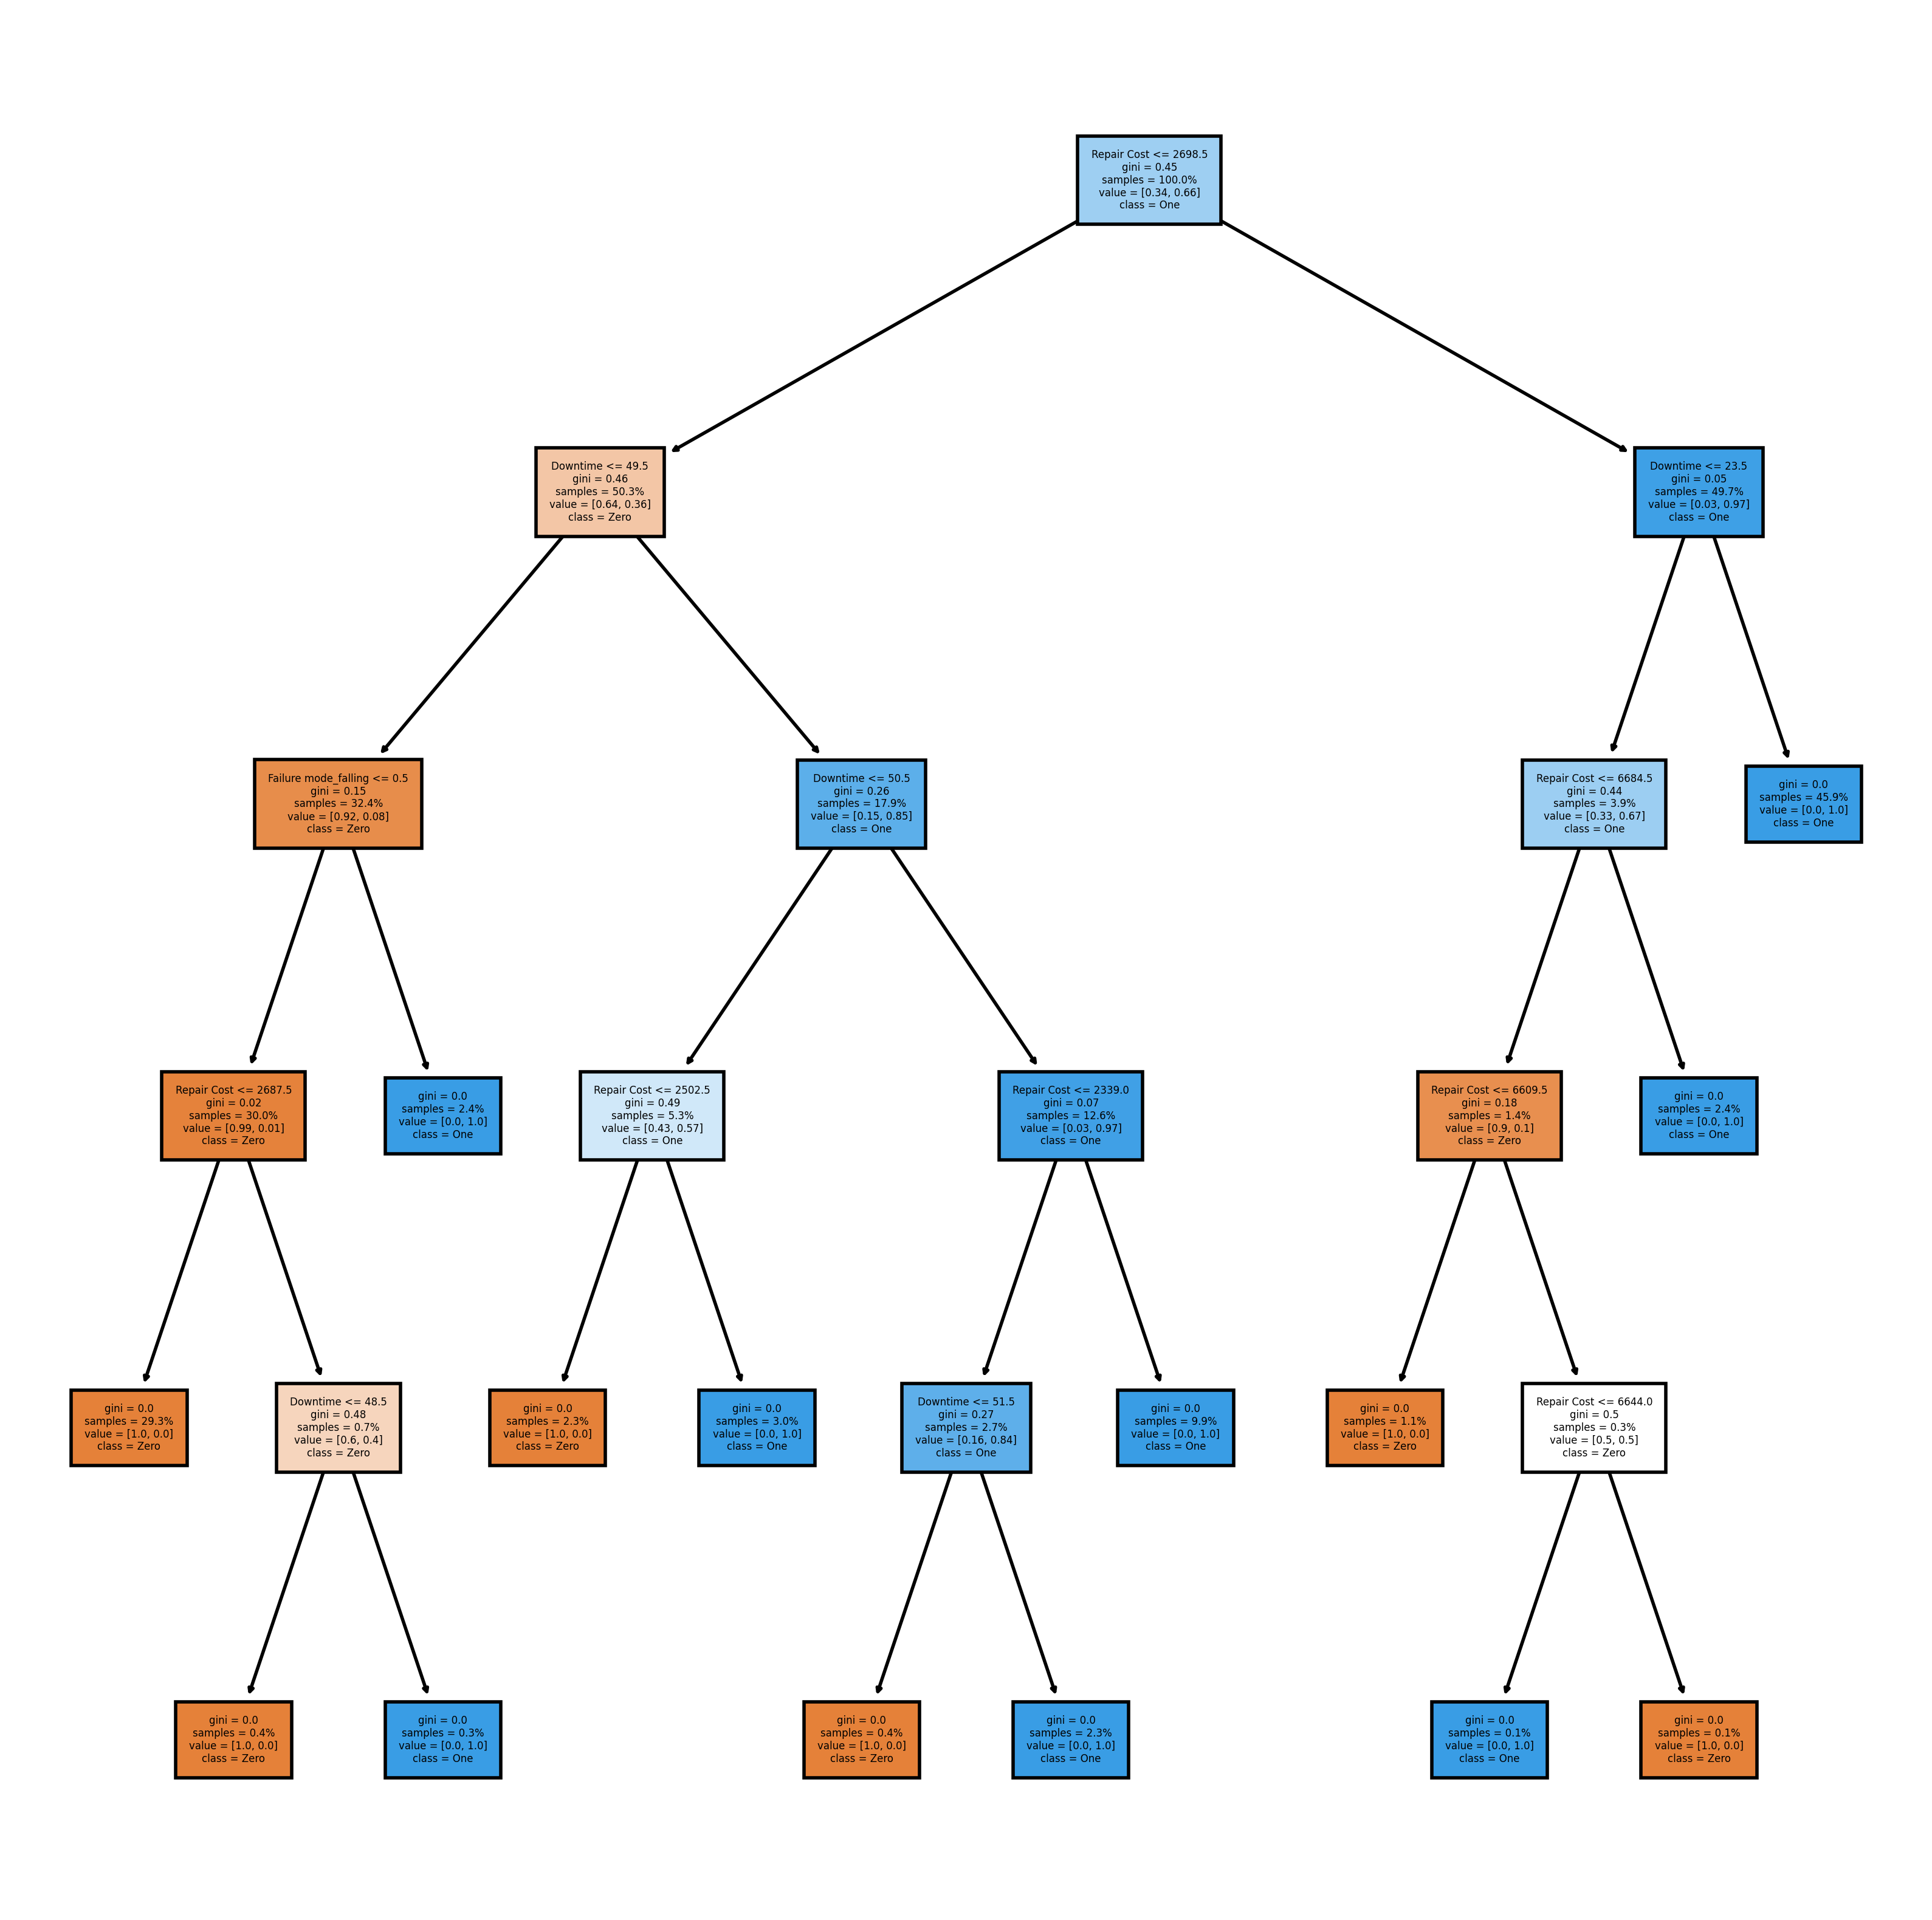

In [79]:
pickle.dump(estimator, open("dt_autopilot.pkl_3", 'wb'))

plt.figure(dpi=400,edgecolor="r",figsize=(10,10))
f = x.columns
c = ["Zero","One"]
plot_tree(estimator, filled=True,feature_names=f,rounded=False,precision=2,fontsize=3,proportion=True,max_depth=None,class_names=c)
plt.savefig('dt.png')
plt.show()

This tree is smaller than the trees from the regression analysis, this tree has only 6 layers. Repair Cost and Down time take over almost all decisions, there is one decision based on a category from Failure Mode. The classification tree has a clear distincition between colours, where different colours represent different classes, corresponding to the severity levels. There are multiple colours used, where the class "Zero" contains all the orange and white colours, the second class, "One", contains all the blue colours. 

#### Prediction using the decision tree 

The same prediction method is used as for the regression approach. 

In [80]:
missing_data_tree_3 = data_new_risk[data_new_risk["Total Severity"].isnull()]

In [81]:
categorical_column = ["Cause", "Asset", "Failure mode"]
numeric_column = ["Repair Cost", "Downtime"]

X_missing_cat = missing_data_tree_3[categorical_column]
X_missing_cat = pd.get_dummies(X_missing_cat, columns= categorical_column)

X_missing_num = missing_data_tree_3[numeric_column]

X_missing = pd.merge(X_missing_cat, X_missing_num, left_index=True, right_index=True)

In [82]:
print("Number of columns in training dataset:", x_train.shape[1])
print("Number of columns in predicting dataset:", X_missing.shape[1])

Number of columns in training dataset: 47
Number of columns in predicting dataset: 38


In [83]:
missing_columns = []
for column in x_train.columns:
    if column not in X_missing.columns:
        missing_columns.append(column)
        mean_value = x_train[column].mean()
        X_missing[column] = mean_value

X_missing = X_missing[x_train.columns] # the columns should also be in the same order as the training data in order to make predictions 
        
print("Missing columns:", len(missing_columns))

Missing columns: 9


In [84]:
predicted_values = estimator.predict(X_missing)
print(predicted_values)

[1. 0. 0. 1. 1. 0. 1. 1. 1. 1. 0. 0. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 0. 0.
 1. 0. 1. 1. 0. 1. 0. 0. 0. 1. 1. 1. 1. 0. 1. 1. 1. 1. 0. 1. 1. 1. 0. 0.
 0. 1. 1. 1. 0. 0. 1. 0. 1. 1. 1. 1. 1. 1. 1. 0. 1. 0. 0. 0. 0. 1. 1. 0.
 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 0. 0. 0. 1. 1. 1. 0.
 0. 1. 0. 1.]


The prediction of the decision tree. 

### *Random Forest Classification*

In [85]:
forest_classification_1 = data_new_risk.dropna(subset=['Total Severity'])

In [86]:
categorical_column = ["Cause", "Asset", "Failure mode"]
numeric_column = ["Repair Cost", "Downtime", "Total Severity"]

x_cat = forest_classification_1[categorical_column]
x_cat = pd.get_dummies(x_cat, columns=categorical_column)

x_num = forest_classification_1[numeric_column]

forest_classification_1 = pd.merge(x_cat, x_num, left_index=True, right_index=True)

In order to use Random Forest for a classification problem some adjustments in the code are made. They are being explained below:

In [87]:
target = 'Total Severity'
features = forest_classification_1.columns[forest_classification_1.columns != target]
X = forest_classification_1[features].values
y = forest_classification_1[target].values
X_train, X_test, y_train, y_test = train_test_split(
X, y, test_size=0.3, random_state=123)


forest = RandomForestClassifier( #using RandomForestClassifier instead of --Regressor 
n_estimators=1000, 
criterion='gini', #default value for the classifier, squared error cannot be used since this is a metric for regression
random_state=1, 
n_jobs=-1)

forest.fit(X_train, y_train)
y_train_pred = forest.predict(X_train)
y_test_pred = forest.predict(X_test)

accuracy_train = metrics.accuracy_score(y_train, y_train_pred) #MAE and R^2 are regression metrics, 
accuracy_test = metrics.accuracy_score(y_test, y_test_pred)      #so they are being replaced by the accuracy score
print('Accuracy train:', accuracy_train)
print('Accuracy test:', accuracy_test)

Accuracy train: 1.0
Accuracy test: 0.9866666666666667


The accuracy score of the training data is lightly better than the testing data. Overall, the model has a good fit for predicting. 

In order to asses the performance of the classification a confusion matrix is used. Only the test data will be used as input for the confusion matrix, as the test data has a perfect score. 

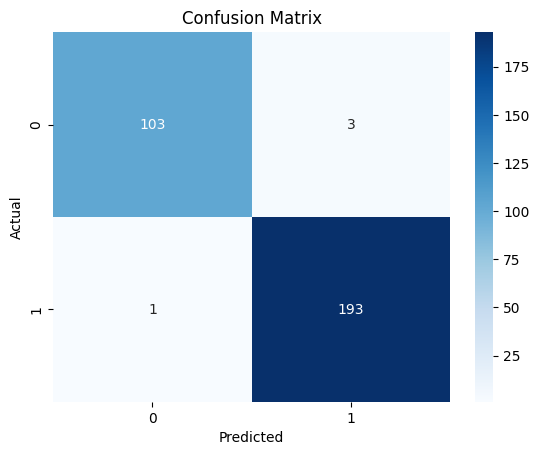

In [88]:
cm = confusion_matrix(y_test, y_test_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

103 instances were correctly predicted as negative. 

3 instances were incorrectly predicted as positive.


1 instance was incorrectly predicted as negative.


193 instances were correctly predicted as positive. 


This explains why the accuracy of the testing data is slightly lower than the accuracy of the training data. 

#### Prediction using Random Forest Classification

The same prediction approach as for the regression will be used. 

In [89]:
missing_data_forest_class_1 = data_new_risk[data_new_risk["Total Severity"].isnull()]

In [90]:
categorical_column = ["Cause", "Asset", "Failure mode"]
numeric_column = ["Repair Cost", "Downtime"]

x_missing_cat = missing_data_forest_class_1[categorical_column]
x_missing_cat = pd.get_dummies(x_missing_cat, columns= categorical_column)

x_missing_num = missing_data_forest_class_1[numeric_column]

x_missing = pd.merge(x_missing_cat, x_missing_num, left_index=True, right_index=True)

In [91]:
print("Number of columns in training dataset:", X_train.shape[1])
print("Number of columns in predicting dataset:", x_missing.shape[1])

Number of columns in training dataset: 47
Number of columns in predicting dataset: 38


In [92]:
missing_columns = []
for column in forest_classification_1.columns[forest_classification_1.columns != target]: #cannot use x_train since it is an NumPy array 
    if column not in x_missing.columns:
        missing_columns.append(column)
        mean_value = forest_classification_1[column].mean()
        x_missing[column] = mean_value

x_missing = x_missing[forest_classification_1.columns[forest_classification_1.columns != target]] 
#the columns in the same order as the training data
        
print("Missing columns:", len(missing_columns))

Missing columns: 9


In [93]:
y_pred_missing = forest.predict(x_missing)
print(y_pred_missing)

C:\Users\vande\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:458: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


[1. 0. 0. 1. 1. 0. 1. 1. 1. 1. 0. 0. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 0. 0.
 1. 0. 1. 1. 0. 1. 0. 0. 0. 1. 1. 1. 1. 0. 1. 1. 1. 1. 0. 1. 1. 1. 0. 0.
 0. 1. 0. 1. 0. 0. 1. 0. 1. 1. 1. 1. 1. 1. 1. 0. 1. 0. 0. 0. 0. 1. 1. 0.
 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 0. 0. 0. 1. 1. 1. 0.
 0. 1. 0. 1.]


The prediction of the random forest classification. 

### *Conclusion Case 1 Scenerio 1*

The accuracy of the decision tree is better for the testing data compared to the random forest classifier. The accuracy for the training data is equal. For prediction the decision tree would therefore outperform the random forest classifier, however the difference is very small, and therefore the random forest classifier is also sufficient for the prediction task. 

### Question 3.2.1.2

*Case 1, Scenario 2*

In [94]:
data_new_risk_2 = merged_data_2.copy()
for index, row in data_new_risk_2.iterrows():
    if row["Total Severity"] <= 1:
        data_new_risk_2.at[index, "Total Severity"] = 0
    elif row["Total Severity"] >= 2:
        data_new_risk_2.at[index, "Total Severity"] = 1

data_new_risk_2.head()

,IncidentID,Date,Tower,Description,Repair Cost,Downtime,Non-financial impact,Total Severity,Cause,Asset,Failure mode,Effect
0,1,05/01/2011,26,Construction error of the gearbox resulted in ...,7449,24,Slippery floor,1.0,Construction error,gearbox,oil lekage,"Cost, downtime and Slippery floor"
1,2,09/01/2011,7,Incorrect input for the pitch system resulted ...,2443,48,NaN,0.0,Incorrect input,pitch system,trip (forced shutdown),"Cost, downtime"
2,3,15/01/2011,22,Construction error of the gearbox resulted in ...,6504,23,Slippery floor,0.0,Construction error,gearbox,oil lekage,"Cost, downtime and Slippery floor"
3,4,20/01/2011,18,Contamination (salt build up) on the transform...,5569,45,NaN,1.0,Contamination (salt build up),transformer,trip (forced shutdown),"Cost, downtime"
4,5,27/01/2011,6,Construction error of the gearbox resulted in ...,7219,26,Slippery floor,1.0,Construction error,gearbox,oil lekage,"Cost, downtime and Slippery floor"


### *Decision tree*

In [95]:
tree_data_new_risk_2 = data_new_risk_2.dropna(subset=['Total Severity'])

In [96]:
categorical_column = ["Cause", "Asset", "Failure mode"]
numeric_column = ["Repair Cost", "Downtime"]

x_cat = tree_data_new_risk_2[categorical_column]
x_cat = pd.get_dummies(x_cat, columns=categorical_column)

x_num = tree_data_new_risk_2[numeric_column]

x = pd.merge(x_cat, x_num, left_index=True, right_index=True)

y = tree_data_new_risk_2["Total Severity"]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1)

estimator = DecisionTreeClassifier()
estimator = estimator.fit(x_train, y_train)

y_pred = estimator.predict(x_test)
y_pred_train = estimator.predict(x_train)
print(y_pred)

[0. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1.
 0. 0. 1. 1. 1. 0. 1. 1. 0. 1. 1. 0. 1. 0. 1. 0. 0. 1. 1. 1. 0. 0. 1. 0.
 1. 0. 1. 1. 1. 1. 1. 0. 1. 1. 1. 0. 1. 0. 0. 1. 1. 1. 0. 0. 1. 1. 1. 1.
 1. 1. 0. 1. 1. 1. 1. 0. 1. 1. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1.
 1. 1. 0. 0. 1. 1. 0. 1. 1. 0. 0. 0. 1. 0. 0. 1. 1. 0. 1. 1. 1. 1. 1. 0.
 0. 1. 1. 0. 1. 0. 0. 1. 0. 1. 1. 0. 1. 0. 0. 1. 1. 0. 1. 1. 0. 1. 0. 1.
 1. 0. 0. 1. 1. 0. 0. 0. 1. 0. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 0. 1. 1.
 1. 1. 0. 1. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 0. 1. 1. 1. 1.
 0. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 0. 1. 0. 1. 0. 1. 0. 0. 1. 0. 1. 1.
 1. 0. 1. 0. 1. 1. 0. 0. 0. 1. 0. 1. 1. 0. 0. 1. 0. 1. 0. 0. 0. 1. 1. 1.
 0. 1. 1. 0. 1. 1. 0. 1. 1. 1. 0. 1. 1. 0. 1. 1. 0. 1. 1. 0. 1. 1. 1. 1.
 1. 0. 1. 1. 1. 1. 1. 0. 1. 1. 0. 1. 1. 0. 1. 1. 1. 0. 0. 1. 1. 1. 1. 1.
 0. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1.]


In [97]:
print("Accuracy test:",metrics.accuracy_score(y_test, y_pred))

Accuracy test: 1.0


In [98]:
print("Accuracy train:",metrics.accuracy_score(y_train, y_pred_train))

Accuracy train: 1.0


Good fit of the model for both testing and training data.  

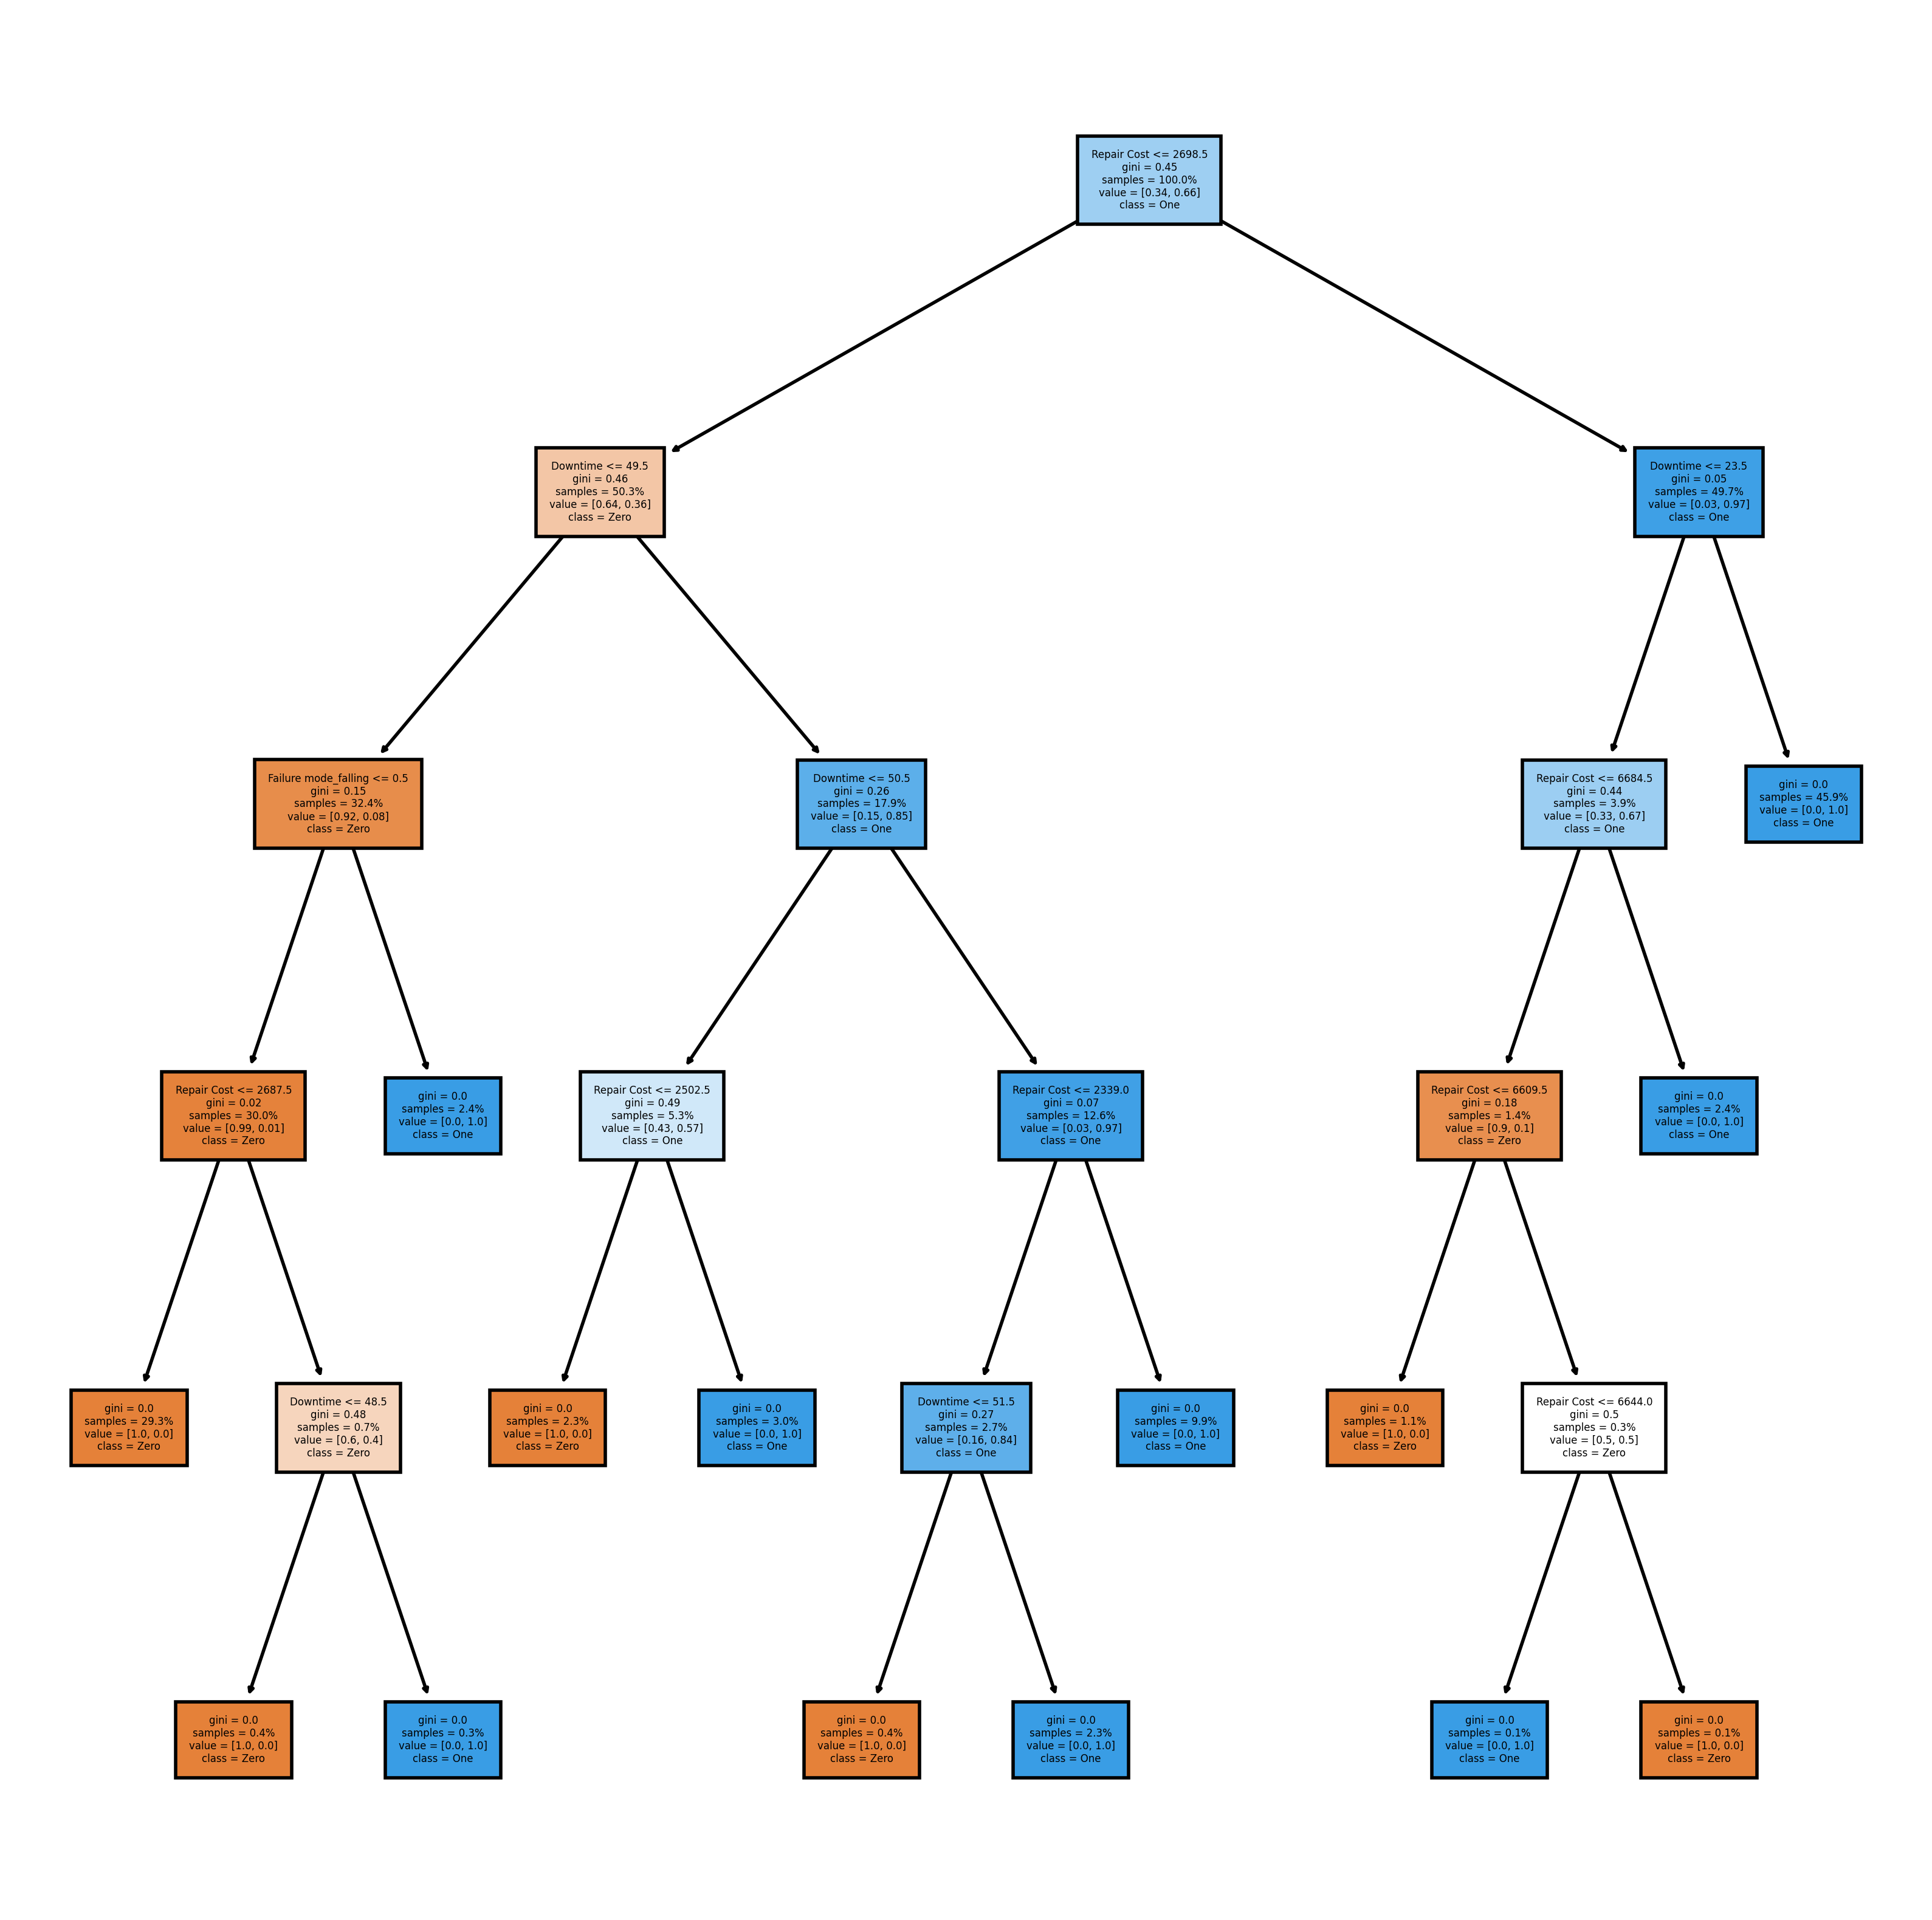

In [99]:
pickle.dump(estimator, open("dt_autopilot.pkl_3", 'wb'))

plt.figure(dpi=400,edgecolor="r",figsize=(10,10))
f = x.columns
c = ["Zero","One"]
plot_tree(estimator, filled=True,feature_names=f,rounded=False,precision=2,fontsize=3,proportion=True,max_depth=None,class_names=c)
plt.savefig('dt.png')
plt.show()

This tree also has 6 layers, just as scenario 1. The same variables are used for the decisions. 

#### Prediction using the decision tree 

In [100]:
missing_data_tree_4 = data_new_risk_2[data_new_risk_2["Total Severity"].isnull()]

In [101]:
categorical_column = ["Cause", "Asset", "Failure mode"]
numeric_column = ["Repair Cost", "Downtime"]

X_missing_cat = missing_data_tree_4[categorical_column]
X_missing_cat = pd.get_dummies(X_missing_cat, columns= categorical_column)

X_missing_num = missing_data_tree_4[numeric_column]

X_missing = pd.merge(X_missing_cat, X_missing_num, left_index=True, right_index=True)

In [102]:
print("Number of columns in training dataset:", x_train.shape[1])
print("Number of columns in predicting dataset:", X_missing.shape[1])

Number of columns in training dataset: 47
Number of columns in predicting dataset: 38


In [103]:
missing_columns = []
for column in x_train.columns:
    if column not in X_missing.columns:
        missing_columns.append(column)
        mean_value = x_train[column].mean()
        X_missing[column] = mean_value

X_missing = X_missing[x_train.columns] # the columns should also be in the same order as the training data in order to make predictions 
        
print("Missing columns:", len(missing_columns))

Missing columns: 9


In [104]:
predicted_values = estimator.predict(X_missing)
print(predicted_values)

[1. 0. 0. 1. 1. 0. 1. 1. 1. 1. 0. 0. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 0. 0.
 1. 0. 1. 1. 0. 1. 0. 0. 0. 1. 1. 1. 1. 0. 1. 1. 1. 1. 0. 1. 1. 1. 0. 0.
 0. 1. 1. 1. 0. 0. 1. 0. 1. 1. 1. 1. 1. 1. 1. 0. 1. 0. 0. 0. 0. 1. 1. 0.
 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 0. 0. 0. 1. 1. 1. 0.
 0. 1. 0. 1.]


The prediction for the classification for the missing values of Total Severity. 

### *Random Forest Classification*

In [105]:
forest_classification_2 = data_new_risk_2.dropna(subset=['Total Severity'])

In [106]:
categorical_column = ["Cause", "Asset", "Failure mode"]
numeric_column = ["Repair Cost", "Downtime", "Total Severity"]

x_cat = forest_classification_2[categorical_column]
x_cat = pd.get_dummies(x_cat, columns=categorical_column)

x_num = forest_classification_2[numeric_column]

forest_classification_2 = pd.merge(x_cat, x_num, left_index=True, right_index=True)

In [107]:
target = 'Total Severity'
features = forest_classification_2.columns[forest_classification_2.columns != target]
X = forest_classification_2[features].values
y = forest_classification_2[target].values
X_train, X_test, y_train, y_test = train_test_split(
X, y, test_size=0.3, random_state=123)


forest = RandomForestClassifier( #using RandomForestClassifier instead of --Regressor 
n_estimators=1000, 
criterion='gini', #default value for the classifier, squared error cannot be used since this is a metric for regression
random_state=1, 
n_jobs=-1)

forest.fit(X_train, y_train)
y_train_pred = forest.predict(X_train)
y_test_pred = forest.predict(X_test)

accuracy_train = metrics.accuracy_score(y_train, y_train_pred) #MAE and R^2 are regression metrics, 
accuracy_test = metrics.accuracy_score(y_test, y_test_pred)      #so they are being replaced by the accuracy score
print('Accuracy train:', accuracy_train)
print('Accuracy test:', accuracy_test)

Accuracy train: 1.0
Accuracy test: 0.9866666666666667


The training data performs slightly better than the testing data. I will look further into the testing data. 

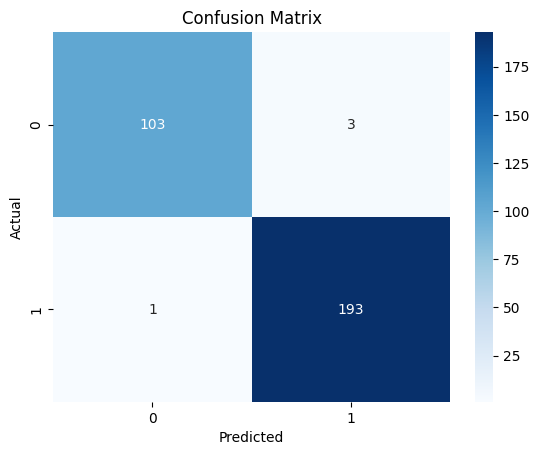

In [108]:
cm = confusion_matrix(y_test, y_test_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

The same scores as scenerio 1. 

#### Prediction using Random Forest Classification

In [109]:
missing_data_forest_class_2 = data_new_risk_2[data_new_risk_2["Total Severity"].isnull()]

In [110]:
categorical_column = ["Cause", "Asset", "Failure mode"]
numeric_column = ["Repair Cost", "Downtime"]

x_missing_cat = missing_data_forest_class_2[categorical_column]
x_missing_cat = pd.get_dummies(x_missing_cat, columns= categorical_column)

x_missing_num = missing_data_forest_class_2[numeric_column]

x_missing = pd.merge(x_missing_cat, x_missing_num, left_index=True, right_index=True)

In [111]:
print("Number of columns in training dataset:", X_train.shape[1])
print("Number of columns in predicting dataset:", x_missing.shape[1])

Number of columns in training dataset: 47
Number of columns in predicting dataset: 38


In [112]:
missing_columns = []
for column in forest_classification_2.columns[forest_classification_2.columns != target]: #cannot use x_train since it is an NumPy array 
    if column not in x_missing.columns:
        missing_columns.append(column)
        mean_value = forest_classification_2[column].mean()
        x_missing[column] = mean_value

x_missing = x_missing[forest_classification_2.columns[forest_classification_2.columns != target]] 
#the columns in the same order as the training data
        
print("Missing columns:", len(missing_columns))

Missing columns: 9


In [113]:
y_pred_missing = forest.predict(x_missing)
print(y_pred_missing)

C:\Users\vande\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:458: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


[1. 0. 0. 1. 1. 0. 1. 1. 1. 1. 0. 0. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 0. 0.
 1. 0. 1. 1. 0. 1. 0. 0. 0. 1. 1. 1. 1. 0. 1. 1. 1. 1. 0. 1. 1. 1. 0. 0.
 0. 1. 0. 1. 0. 0. 1. 0. 1. 1. 1. 1. 1. 1. 1. 0. 1. 0. 0. 0. 0. 1. 1. 0.
 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 0. 0. 0. 1. 1. 1. 0.
 0. 1. 0. 1.]


The prediction of the random forest classifier. 

### *Conclusion Case 1 Scenerio 2*

The same conclusion holds as for scenerio 1. 

### Question 3.2.2.1

*Case 2, Scenario 1*

Assigning 0 to level 1 and 2, and assigning 1 to level 3 and higher 

In [114]:
data_newest_risk = merged_data_1.copy()
for index, row in data_newest_risk.iterrows():
    if row["Total Severity"] <= 2:
        data_newest_risk.at[index, "Total Severity"] = 0
    elif row["Total Severity"] >= 3:
        data_newest_risk.at[index, "Total Severity"] = 1

data_newest_risk.head()

,IncidentID,Date,Tower,Description,Repair Cost,Downtime,Non-financial impact,Total Severity,Cause,Asset,Failure mode,Effect
0,1,05/01/2011,26,Construction error of the gearbox resulted in ...,7449,24,Slippery floor,0.0,Construction error,gearbox,oil lekage,"Cost, downtime and Slippery floor"
1,2,09/01/2011,7,Incorrect input for the pitch system resulted ...,2443,48,NaN,0.0,Incorrect input,pitch system,trip (forced shutdown),"Cost, downtime"
2,3,15/01/2011,22,Construction error of the gearbox resulted in ...,6504,23,Slippery floor,0.0,Construction error,gearbox,oil lekage,"Cost, downtime and Slippery floor"
3,4,20/01/2011,18,Contamination (salt build up) on the transform...,5569,45,NaN,0.0,Contamination (salt build up),transformer,trip (forced shutdown),"Cost, downtime"
4,5,27/01/2011,6,Construction error of the gearbox resulted in ...,7219,26,Slippery floor,0.0,Construction error,gearbox,oil lekage,"Cost, downtime and Slippery floor"


### *Decision tree*

In [115]:
tree_data_new_risk_3 = data_newest_risk.dropna(subset=['Total Severity'])

In [116]:
categorical_column = ["Cause", "Asset", "Failure mode"]
numeric_column = ["Repair Cost", "Downtime"]

x_cat = tree_data_new_risk_3[categorical_column]
x_cat = pd.get_dummies(x_cat, columns=categorical_column)

x_num = tree_data_new_risk_3[numeric_column]

x = pd.merge(x_cat, x_num, left_index=True, right_index=True)

y = tree_data_new_risk_3["Total Severity"]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1)

estimator = DecisionTreeClassifier()
estimator = estimator.fit(x_train, y_train)

In [117]:
y_pred = estimator.predict(x_test)
y_pred_train = estimator.predict(x_train)
print(y_pred)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.
 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.
 1. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0.
 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.
 0. 0. 0. 0. 1. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.
 0. 0. 1. 1. 0. 0. 0. 1. 0. 0. 0. 0.]


In [118]:
print("Accuracy test:",metrics.accuracy_score(y_test, y_pred))

Accuracy test: 1.0


In [119]:
print("Accuracy train:",metrics.accuracy_score(y_train, y_pred_train))

Accuracy train: 1.0


Perfect scores. 

In [120]:
pickle.dump(estimator, open("dt_autopilot.pkl_3", 'wb'))

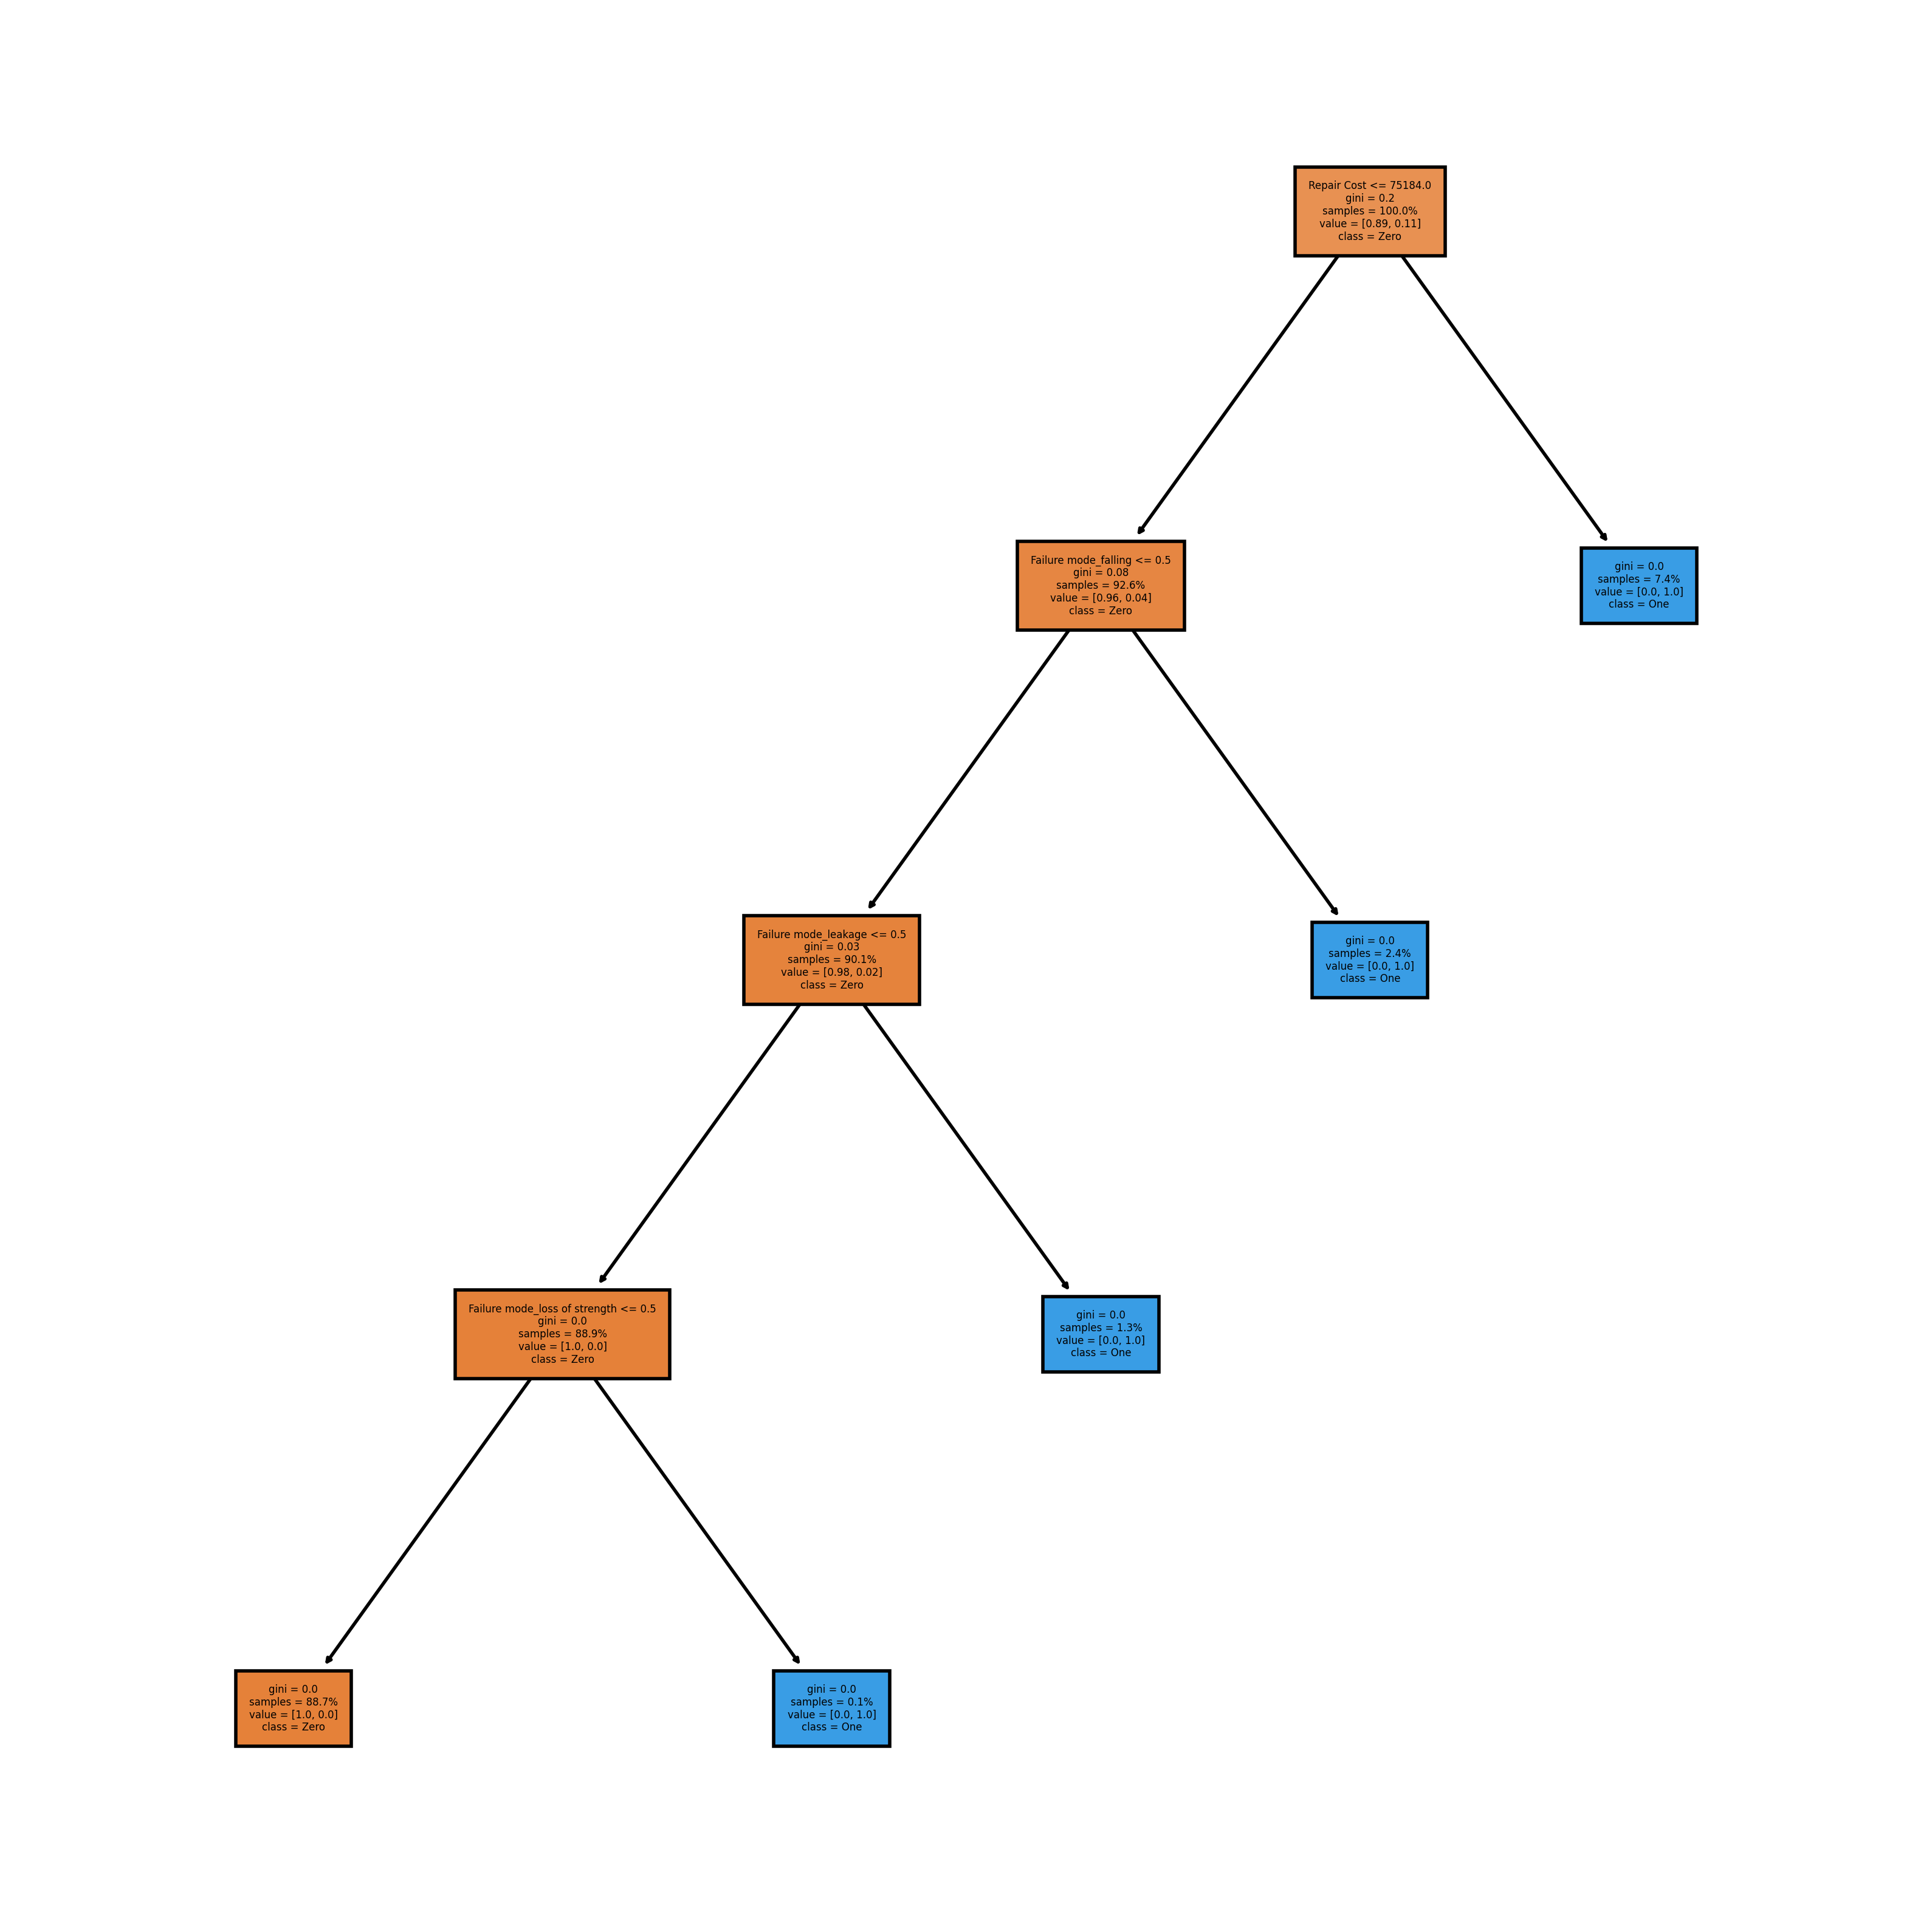

In [121]:
plt.figure(dpi=400,edgecolor="r",figsize=(10,10))
f = x.columns
c = ["Zero", "One"]
plot_tree(estimator, filled=True,feature_names=f,rounded=False,precision=2,fontsize=3,proportion=True,max_depth=None,class_names=c)
plt.savefig('dt.png')
plt.show()

This tree is noticeably smaller than the previous classification trees. This tree consists of Repair cost, and three different categories from Failure Mode. This tree only has two colours, no different shades are used. 

#### Prediction using the decision tree

In [122]:
missing_data_tree_5 = data_newest_risk[data_newest_risk["Total Severity"].isnull()]

In [123]:
categorical_column = ["Cause", "Asset", "Failure mode"]
numeric_column = ["Repair Cost", "Downtime"]

X_missing_cat = missing_data_tree_5[categorical_column]
X_missing_cat = pd.get_dummies(X_missing_cat, columns= categorical_column)

X_missing_num = missing_data_tree_5[numeric_column]

X_missing = pd.merge(X_missing_cat, X_missing_num, left_index=True, right_index=True)

In [124]:
print("Number of columns in training dataset:", x_train.shape[1])
print("Number of columns in predicting dataset:", X_missing.shape[1])

Number of columns in training dataset: 47
Number of columns in predicting dataset: 38


In [125]:
missing_columns = []
for column in x_train.columns:
    if column not in X_missing.columns:
        missing_columns.append(column)
        mean_value = x_train[column].mean()
        X_missing[column] = mean_value

X_missing = X_missing[x_train.columns] # the columns should also be in the same order as the training data in order to make predictions 
        
print("Missing columns:", len(missing_columns))

Missing columns: 9


In [126]:
predicted_values = estimator.predict(X_missing)
print(predicted_values)

[0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 1. 1. 0. 0.
 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0.
 0. 0. 0. 0.]


The prediction of the decision tree. 

### *Random Forest Classification*

In [127]:
forest_classification_3 = data_newest_risk.dropna(subset=['Total Severity'])

In [128]:
categorical_column = ["Cause", "Asset", "Failure mode"]
numeric_column = ["Repair Cost", "Downtime", "Total Severity"]

x_cat = forest_classification_3[categorical_column]
x_cat = pd.get_dummies(x_cat, columns=categorical_column)

x_num = forest_classification_3[numeric_column]

forest_classification_3 = pd.merge(x_cat, x_num, left_index=True, right_index=True)

In [129]:
target = 'Total Severity'
features = forest_classification_3.columns[forest_classification_3.columns != target]
X = forest_classification_3[features].values
y = forest_classification_3[target].values
X_train, X_test, y_train, y_test = train_test_split(
X, y, test_size=0.3, random_state=123)


forest = RandomForestClassifier( #using RandomForestClassifier instead of --Regressor 
n_estimators=1000, 
criterion='gini', #default value for the classifier, squared error cannot be used since this is a metric for regression
random_state=1, 
n_jobs=-1)

forest.fit(X_train, y_train)
y_train_pred = forest.predict(X_train)
y_test_pred = forest.predict(X_test)

accuracy_train = metrics.accuracy_score(y_train, y_train_pred) #MAE and R^2 are regression metrics, 
accuracy_test = metrics.accuracy_score(y_test, y_test_pred)      #so they are being replaced by the accuracy score
print('Accuracy train:', accuracy_train)
print('Accuracy test:', accuracy_test)

Accuracy train: 1.0
Accuracy test: 1.0


Perfect scores, no need for the confusion matrix. 

#### Prediction using Random Forest Classifier

In [130]:
missing_data_forest_class_3 = data_newest_risk[data_newest_risk["Total Severity"].isnull()]

In [131]:
categorical_column = ["Cause", "Asset", "Failure mode"]
numeric_column = ["Repair Cost", "Downtime"]

x_missing_cat = missing_data_forest_class_3[categorical_column]
x_missing_cat = pd.get_dummies(x_missing_cat, columns= categorical_column)

x_missing_num = missing_data_forest_class_3[numeric_column]

x_missing = pd.merge(x_missing_cat, x_missing_num, left_index=True, right_index=True)

In [132]:
print("Number of columns in training dataset:", X_train.shape[1])
print("Number of columns in predicting dataset:", x_missing.shape[1])

Number of columns in training dataset: 47
Number of columns in predicting dataset: 38


In [133]:
missing_columns = []
for column in forest_classification_3.columns[forest_classification_3.columns != target]: #cannot use x_train since it is an NumPy array 
    if column not in x_missing.columns:
        missing_columns.append(column)
        mean_value = forest_classification_3[column].mean()
        x_missing[column] = mean_value

x_missing = x_missing[forest_classification_3.columns[forest_classification_3.columns != target]] 
#the columns in the same order as the training data
        
print("Missing columns:", len(missing_columns))

Missing columns: 9


In [134]:
y_pred_missing = forest.predict(x_missing)
print(y_pred_missing)

C:\Users\vande\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:458: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


[0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 1. 1. 0. 0.
 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0.
 0. 0. 0. 0.]


The prediction of the random forest classifier. 

### *Conclusion Case 2, Scenerio 1*

The accuracy scores for the decision tree and the random forest regressor are for training and testing exactly the same, therefore there is no method more accurate for the prediction task, both methods are equally suitable. 

### Question 3.2.2.2

*Case 2, Scenerio 2*

In [135]:
data_newest_risk_2 = merged_data_2.copy()
for index, row in data_newest_risk_2.iterrows():
    if row["Total Severity"] <= 2:
        data_newest_risk_2.at[index, "Total Severity"] = 0
    elif row["Total Severity"] >= 3:
        data_newest_risk_2.at[index, "Total Severity"] = 1

data_newest_risk_2.head()

,IncidentID,Date,Tower,Description,Repair Cost,Downtime,Non-financial impact,Total Severity,Cause,Asset,Failure mode,Effect
0,1,05/01/2011,26,Construction error of the gearbox resulted in ...,7449,24,Slippery floor,0.0,Construction error,gearbox,oil lekage,"Cost, downtime and Slippery floor"
1,2,09/01/2011,7,Incorrect input for the pitch system resulted ...,2443,48,NaN,0.0,Incorrect input,pitch system,trip (forced shutdown),"Cost, downtime"
2,3,15/01/2011,22,Construction error of the gearbox resulted in ...,6504,23,Slippery floor,0.0,Construction error,gearbox,oil lekage,"Cost, downtime and Slippery floor"
3,4,20/01/2011,18,Contamination (salt build up) on the transform...,5569,45,NaN,0.0,Contamination (salt build up),transformer,trip (forced shutdown),"Cost, downtime"
4,5,27/01/2011,6,Construction error of the gearbox resulted in ...,7219,26,Slippery floor,0.0,Construction error,gearbox,oil lekage,"Cost, downtime and Slippery floor"


### *Decision tree*

In [136]:
tree_data_new_risk_4 = data_newest_risk_2.dropna(subset=['Total Severity'])

In [137]:
categorical_column = ["Cause", "Asset", "Failure mode"]
numeric_column = ["Repair Cost", "Downtime"]

x_cat = tree_data_new_risk_4[categorical_column]
x_cat = pd.get_dummies(x_cat, columns=categorical_column)

x_num = tree_data_new_risk_4[numeric_column]

x = pd.merge(x_cat, x_num, left_index=True, right_index=True)

y = tree_data_new_risk["Total Severity"]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1)

estimator = DecisionTreeClassifier()
estimator = estimator.fit(x_train, y_train)

y_pred = estimator.predict(x_test)
y_pred_train = estimator.predict(x_train)
print(y_pred)

[0. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1.
 0. 0. 1. 1. 1. 0. 1. 1. 0. 1. 1. 0. 1. 0. 1. 0. 0. 1. 1. 1. 0. 0. 1. 0.
 1. 0. 1. 1. 1. 1. 1. 0. 1. 1. 1. 0. 1. 0. 0. 1. 1. 1. 0. 0. 1. 1. 1. 1.
 1. 1. 0. 1. 1. 1. 1. 0. 1. 1. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1.
 1. 1. 0. 0. 1. 1. 0. 1. 1. 0. 0. 0. 1. 0. 0. 1. 1. 0. 1. 1. 1. 1. 1. 0.
 0. 1. 1. 0. 1. 0. 0. 1. 0. 1. 1. 0. 1. 0. 0. 1. 1. 0. 1. 1. 0. 1. 0. 1.
 1. 0. 0. 1. 1. 0. 0. 0. 1. 0. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 0. 1. 1.
 1. 1. 0. 1. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 0. 1. 1. 1. 1.
 0. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 0. 1. 0. 1. 0. 1. 0. 0. 1. 0. 1. 1.
 1. 0. 1. 0. 1. 1. 0. 0. 0. 1. 0. 1. 1. 0. 0. 1. 0. 1. 0. 0. 0. 1. 1. 1.
 0. 1. 1. 0. 1. 1. 0. 1. 1. 1. 0. 1. 1. 0. 1. 1. 0. 1. 1. 0. 1. 1. 1. 1.
 1. 0. 1. 1. 1. 1. 1. 0. 1. 1. 0. 1. 1. 0. 1. 1. 1. 0. 0. 1. 1. 1. 1. 1.
 0. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1.]


In [138]:
print("Accuracy test:",metrics.accuracy_score(y_test, y_pred))

Accuracy test: 1.0


In [139]:
print("Accuracy train:",metrics.accuracy_score(y_train, y_pred_train))

Accuracy train: 1.0


Good fit of the model for both testing and training data. 

In [140]:
pickle.dump(estimator, open("dt_autopilot.pkl_3", 'wb'))

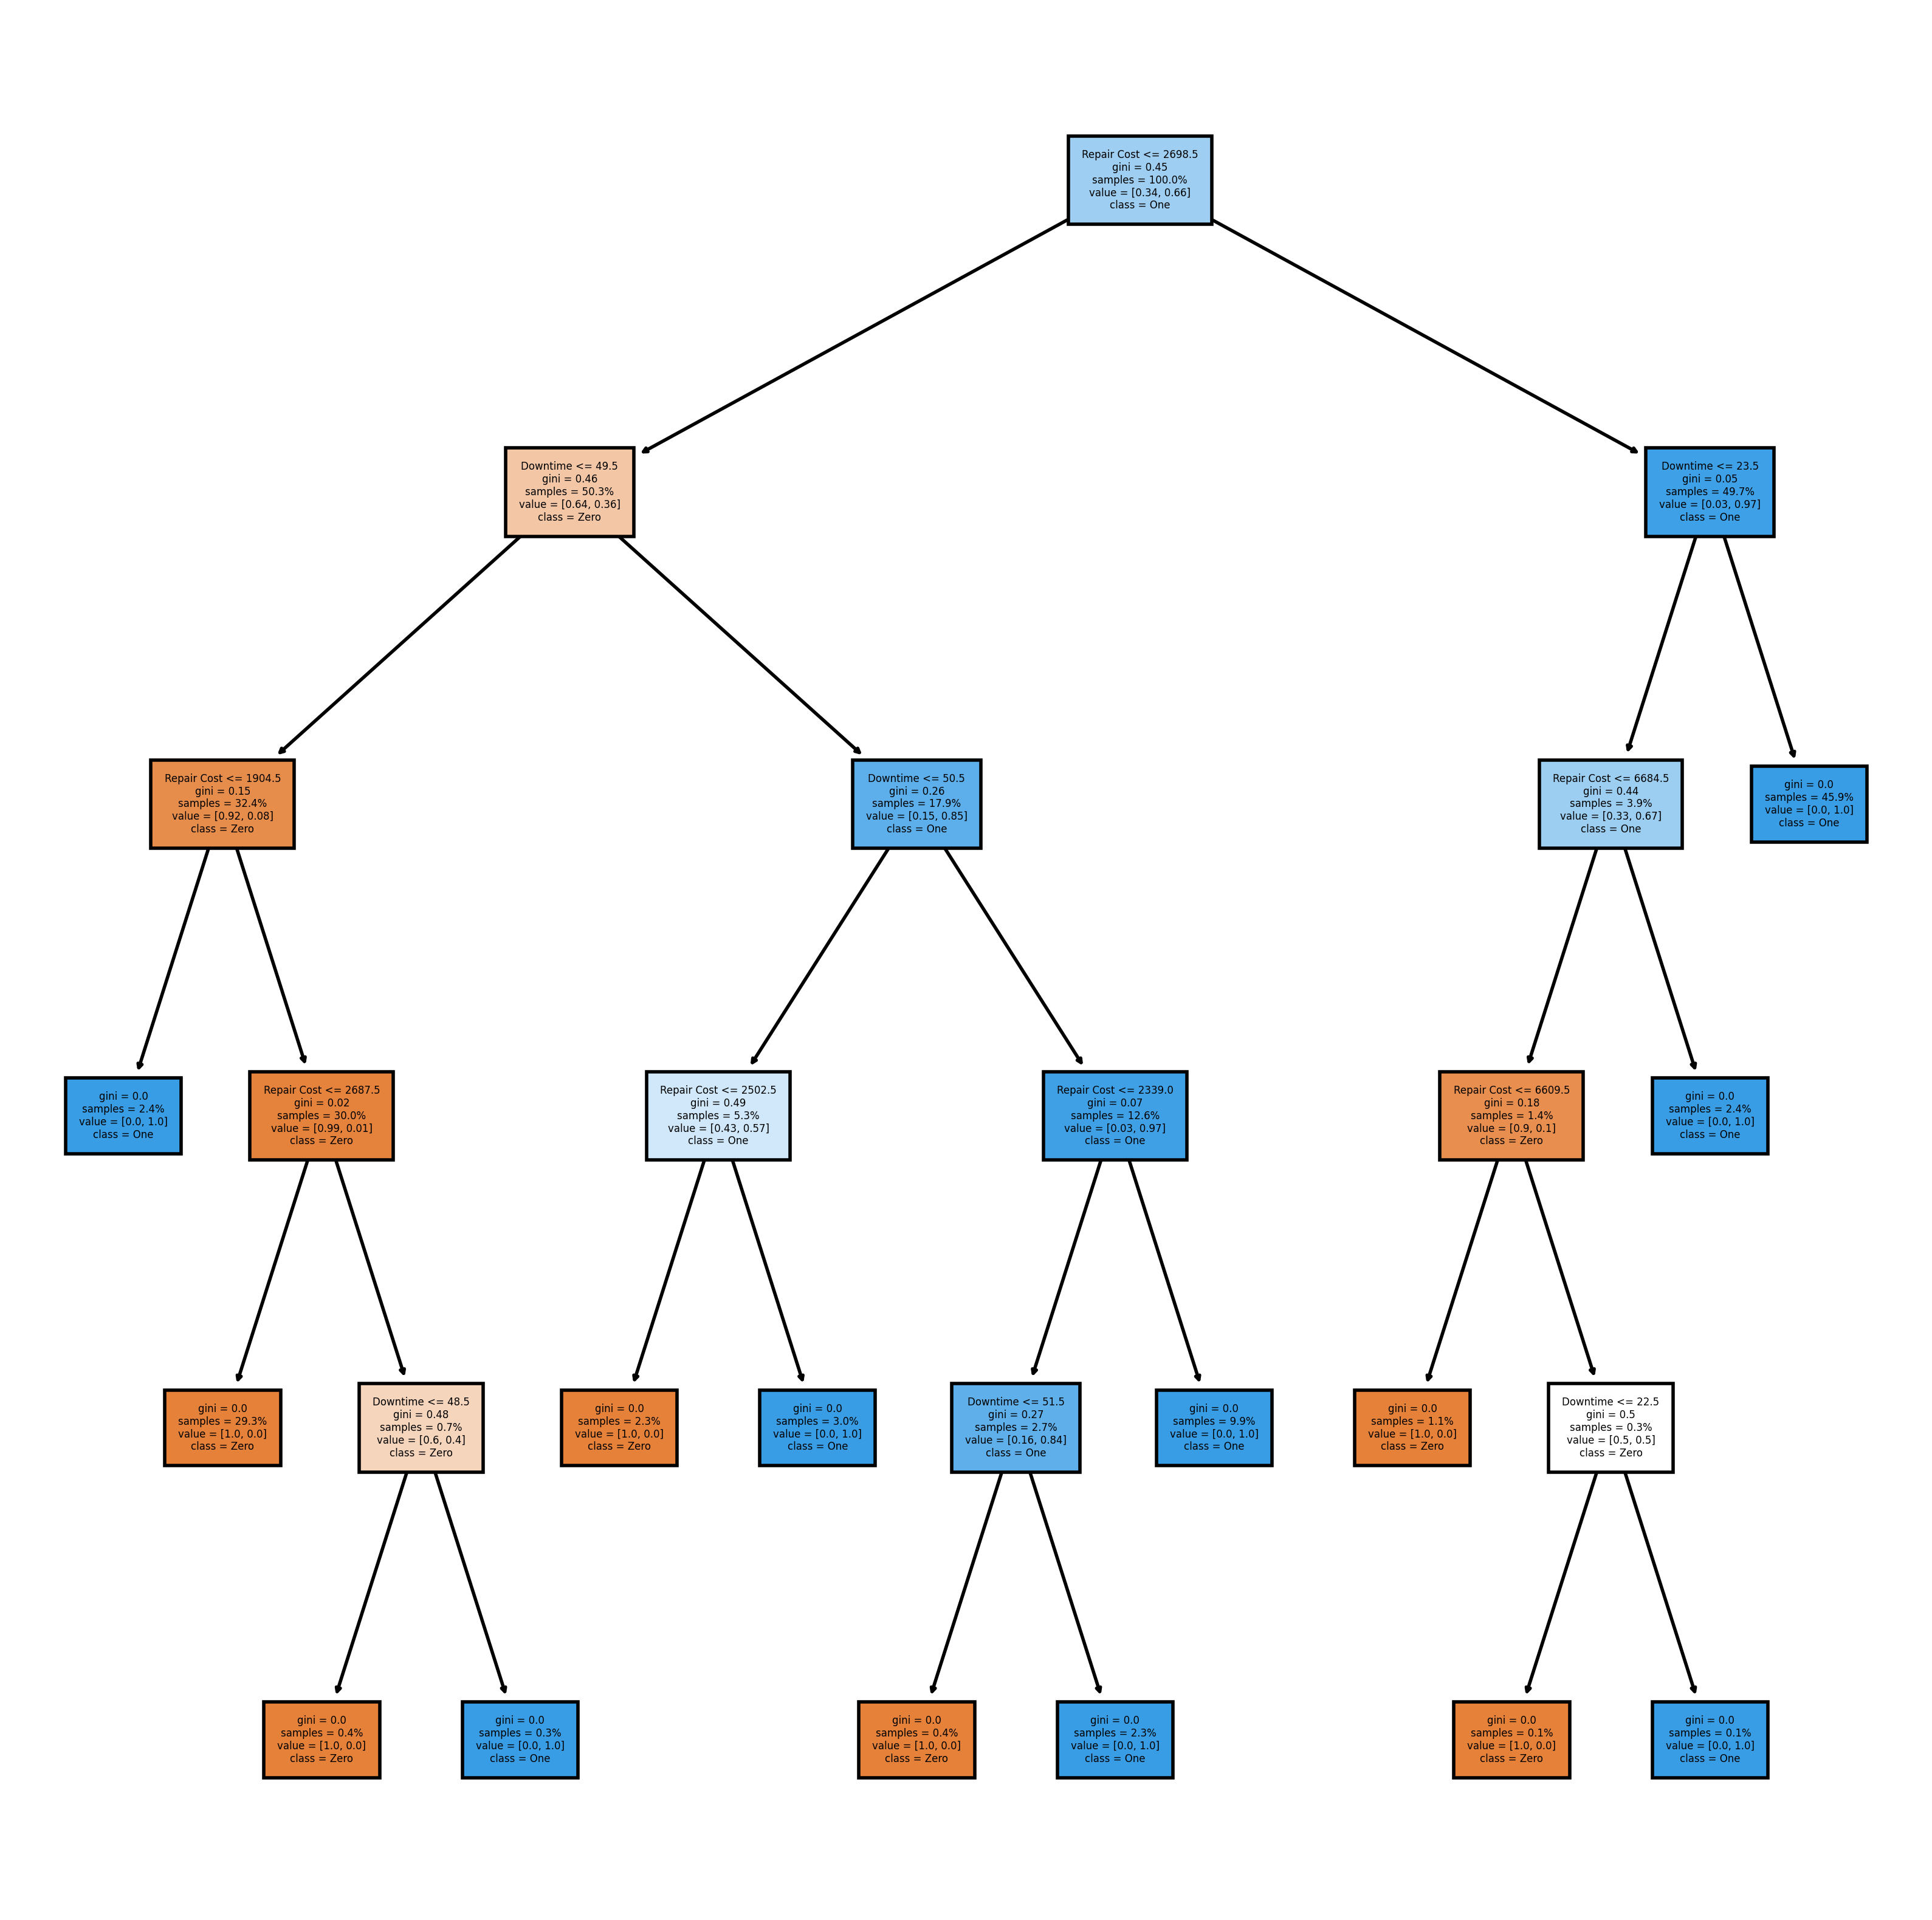

In [141]:
plt.figure(dpi=400,edgecolor="r",figsize=(10,10))
f = x.columns
c = ["Zero", "One"]
plot_tree(estimator, filled=True,feature_names=f,rounded=False,precision=2,fontsize=3,proportion=True,max_depth=None,class_names=c)
plt.savefig('dt.png')
plt.show()

This model is bigger than the previous model. This model only consists of the categories Downtime and Repair Cost. Different shades are used as one class level can be split in two outcomes for a single decision. 

#### Prediction using the decision tree

In [142]:
missing_data_tree_6 = data_newest_risk_2[data_newest_risk_2["Total Severity"].isnull()]

In [143]:
categorical_column = ["Cause", "Asset", "Failure mode"]
numeric_column = ["Repair Cost", "Downtime"]

X_missing_cat = missing_data_tree_6[categorical_column]
X_missing_cat = pd.get_dummies(X_missing_cat, columns= categorical_column)

X_missing_num = missing_data_tree_6[numeric_column]

X_missing = pd.merge(X_missing_cat, X_missing_num, left_index=True, right_index=True)

In [144]:
print("Number of columns in training dataset:", x_train.shape[1])
print("Number of columns in predicting dataset:", X_missing.shape[1])

Number of columns in training dataset: 47
Number of columns in predicting dataset: 38


In [145]:
missing_columns = []
for column in x_train.columns:
    if column not in X_missing.columns:
        missing_columns.append(column)
        mean_value = x_train[column].mean()
        X_missing[column] = mean_value

X_missing = X_missing[x_train.columns] # the columns should also be in the same order as the training data in order to make predictions 
        
print("Missing columns:", len(missing_columns))

Missing columns: 9


In [146]:
predicted_values = estimator.predict(X_missing)
print(predicted_values)

[1. 0. 0. 1. 1. 0. 1. 1. 1. 1. 0. 0. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 0. 0.
 1. 0. 1. 1. 0. 1. 0. 0. 0. 1. 1. 1. 1. 0. 1. 1. 1. 1. 0. 1. 1. 1. 0. 0.
 0. 1. 1. 1. 0. 0. 1. 0. 1. 1. 1. 1. 1. 1. 1. 0. 1. 0. 0. 0. 0. 1. 1. 0.
 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 0. 0. 0. 1. 1. 1. 0.
 1. 1. 0. 1.]


The prediction of the decision tree.

### *Random Forest Classification*

In [147]:
forest_classification_4 = data_newest_risk_2.dropna(subset=['Total Severity'])

In [148]:
categorical_column = ["Cause", "Asset", "Failure mode"]
numeric_column = ["Repair Cost", "Downtime", "Total Severity"]

x_cat = forest_classification_4[categorical_column]
x_cat = pd.get_dummies(x_cat, columns=categorical_column)

x_num = forest_classification_4[numeric_column]

forest_classification_4 = pd.merge(x_cat, x_num, left_index=True, right_index=True)

In [149]:
target = 'Total Severity'
features = forest_classification_4.columns[forest_classification_4.columns != target]
X = forest_classification_4[features].values
y = forest_classification_4[target].values
X_train, X_test, y_train, y_test = train_test_split(
X, y, test_size=0.3, random_state=123)


forest = RandomForestClassifier( #using RandomForestClassifier instead of --Regressor 
n_estimators=1000, 
criterion='gini', #default value for the classifier, squared error cannot be used since this is a metric for regression
random_state=1, 
n_jobs=-1)

forest.fit(X_train, y_train)
y_train_pred = forest.predict(X_train)
y_test_pred = forest.predict(X_test)

accuracy_train = metrics.accuracy_score(y_train, y_train_pred) #MAE and R^2 are regression metrics, 
accuracy_test = metrics.accuracy_score(y_test, y_test_pred)      #so they are being replaced by the accuracy score
print('Accuracy train:', accuracy_train)
print('Accuracy test:', accuracy_test)

Accuracy train: 1.0
Accuracy test: 1.0


Perfect fit of the model. 

#### Prediction using Random Forest Classifier

In [150]:
missing_data_forest_class_4 = data_newest_risk_2[data_newest_risk_2["Total Severity"].isnull()]

In [151]:
categorical_column = ["Cause", "Asset", "Failure mode"]
numeric_column = ["Repair Cost", "Downtime"]

x_missing_cat = missing_data_forest_class_4[categorical_column]
x_missing_cat = pd.get_dummies(x_missing_cat, columns= categorical_column)

x_missing_num = missing_data_forest_class_4[numeric_column]

x_missing = pd.merge(x_missing_cat, x_missing_num, left_index=True, right_index=True)

In [152]:
print("Number of columns in training dataset:", X_train.shape[1])
print("Number of columns in predicting dataset:", x_missing.shape[1])

Number of columns in training dataset: 47
Number of columns in predicting dataset: 38


In [153]:
missing_columns = []
for column in forest_classification_4.columns[forest_classification_4.columns != target]: #cannot use x_train since it is an NumPy array 
    if column not in x_missing.columns:
        missing_columns.append(column)
        mean_value = forest_classification_4[column].mean()
        x_missing[column] = mean_value

x_missing = x_missing[forest_classification_4.columns[forest_classification_4.columns != target]] 
#the columns in the same order as the training data
        
print("Missing columns:", len(missing_columns))

Missing columns: 9


In [154]:
y_pred_missing = forest.predict(x_missing)
print(y_pred_missing)

C:\Users\vande\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:458: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


[0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 1. 1. 0. 0.
 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0.
 0. 0. 0. 0.]


The prediction of the random forest classifiction. 

### *Conclusion Case 2, Scenerio 2*

The same conclusion as for scenerio 1 holds, both methods are equally suitable. 